In [1]:
import pandas as pd
import numpy as np

In [2]:
import warnings

# Ignore all warnings
warnings.filterwarnings('ignore')

In [3]:
df_train = pd.read_csv('/kaggle/input/child-mind-institute-problematic-internet-use/train.csv')

In [4]:
df_train

,id,Basic_Demos-Enroll_Season,Basic_Demos-Age,Basic_Demos-Sex,CGAS-Season,CGAS-CGAS_Score,Physical-Season,Physical-BMI,Physical-Height,Physical-Weight,...,PCIAT-PCIAT_18,PCIAT-PCIAT_19,PCIAT-PCIAT_20,PCIAT-PCIAT_Total,SDS-Season,SDS-SDS_Total_Raw,SDS-SDS_Total_T,PreInt_EduHx-Season,PreInt_EduHx-computerinternet_hoursday,sii
0,00008ff9,Fall,5,0,Winter,51.0,Fall,16.877316,46.0,50.8,...,4.0,2.0,4.0,55.0,NaN,NaN,NaN,Fall,3.0,2.0
1,000fd460,Summer,9,0,NaN,NaN,Fall,14.035590,48.0,46.0,...,0.0,0.0,0.0,0.0,Fall,46.0,64.0,Summer,0.0,0.0
2,00105258,Summer,10,1,Fall,71.0,Fall,16.648696,56.5,75.6,...,2.0,1.0,1.0,28.0,Fall,38.0,54.0,Summer,2.0,0.0
3,00115b9f,Winter,9,0,Fall,71.0,Summer,18.292347,56.0,81.6,...,3.0,4.0,1.0,44.0,Summer,31.0,45.0,Winter,0.0,1.0
4,0016bb22,Spring,18,1,Summer,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3955,ff8a2de4,Fall,13,0,Spring,60.0,Fall,16.362460,59.5,82.4,...,1.0,1.0,0.0,32.0,Winter,35.0,50.0,Fall,1.0,1.0
3956,ffa9794a,Winter,10,0,NaN,NaN,Spring,18.764678,53.5,76.4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Winter,0.0,NaN
3957,ffcd4dbd,Fall,11,0,Spring,68.0,Winter,21.441500,60.0,109.8,...,1.0,0.0,1.0,31.0,Winter,56.0,77.0,Fall,0.0,1.0
3958,ffed1dd5,Spring,13,0,Spring,70.0,Winter,12.235895,70.7,87.0,...,1.0,1.0,1.0,19.0,Spring,33.0,47.0,Spring,1.0,0.0


In [5]:
df_train.columns 

Index(['id', 'Basic_Demos-Enroll_Season', 'Basic_Demos-Age', 'Basic_Demos-Sex',
       'CGAS-Season', 'CGAS-CGAS_Score', 'Physical-Season', 'Physical-BMI',
       'Physical-Height', 'Physical-Weight', 'Physical-Waist_Circumference',
       'Physical-Diastolic_BP', 'Physical-HeartRate', 'Physical-Systolic_BP',
       'Fitness_Endurance-Season', 'Fitness_Endurance-Max_Stage',
       'Fitness_Endurance-Time_Mins', 'Fitness_Endurance-Time_Sec',
       'FGC-Season', 'FGC-FGC_CU', 'FGC-FGC_CU_Zone', 'FGC-FGC_GSND',
       'FGC-FGC_GSND_Zone', 'FGC-FGC_GSD', 'FGC-FGC_GSD_Zone', 'FGC-FGC_PU',
       'FGC-FGC_PU_Zone', 'FGC-FGC_SRL', 'FGC-FGC_SRL_Zone', 'FGC-FGC_SRR',
       'FGC-FGC_SRR_Zone', 'FGC-FGC_TL', 'FGC-FGC_TL_Zone', 'BIA-Season',
       'BIA-BIA_Activity_Level_num', 'BIA-BIA_BMC', 'BIA-BIA_BMI',
       'BIA-BIA_BMR', 'BIA-BIA_DEE', 'BIA-BIA_ECW', 'BIA-BIA_FFM',
       'BIA-BIA_FFMI', 'BIA-BIA_FMI', 'BIA-BIA_Fat', 'BIA-BIA_Frame_num',
       'BIA-BIA_ICW', 'BIA-BIA_LDM', 'BIA-BIA_LST'

In [6]:
df_test = pd.read_csv('/kaggle/input/child-mind-institute-problematic-internet-use/test.csv')

In [7]:
df_test.columns

Index(['id', 'Basic_Demos-Enroll_Season', 'Basic_Demos-Age', 'Basic_Demos-Sex',
       'CGAS-Season', 'CGAS-CGAS_Score', 'Physical-Season', 'Physical-BMI',
       'Physical-Height', 'Physical-Weight', 'Physical-Waist_Circumference',
       'Physical-Diastolic_BP', 'Physical-HeartRate', 'Physical-Systolic_BP',
       'Fitness_Endurance-Season', 'Fitness_Endurance-Max_Stage',
       'Fitness_Endurance-Time_Mins', 'Fitness_Endurance-Time_Sec',
       'FGC-Season', 'FGC-FGC_CU', 'FGC-FGC_CU_Zone', 'FGC-FGC_GSND',
       'FGC-FGC_GSND_Zone', 'FGC-FGC_GSD', 'FGC-FGC_GSD_Zone', 'FGC-FGC_PU',
       'FGC-FGC_PU_Zone', 'FGC-FGC_SRL', 'FGC-FGC_SRL_Zone', 'FGC-FGC_SRR',
       'FGC-FGC_SRR_Zone', 'FGC-FGC_TL', 'FGC-FGC_TL_Zone', 'BIA-Season',
       'BIA-BIA_Activity_Level_num', 'BIA-BIA_BMC', 'BIA-BIA_BMI',
       'BIA-BIA_BMR', 'BIA-BIA_DEE', 'BIA-BIA_ECW', 'BIA-BIA_FFM',
       'BIA-BIA_FFMI', 'BIA-BIA_FMI', 'BIA-BIA_Fat', 'BIA-BIA_Frame_num',
       'BIA-BIA_ICW', 'BIA-BIA_LDM', 'BIA-BIA_LST'

In [8]:
df_train.shape

(3960, 82)

In [9]:
df_test.shape

(20, 59)

In [10]:
nan_train_counts = df_train.isna().sum()

for column, count in nan_train_counts.items():
    print(f'{column}: {count}')

id: 0
Basic_Demos-Enroll_Season: 0
Basic_Demos-Age: 0
Basic_Demos-Sex: 0
CGAS-Season: 1405
CGAS-CGAS_Score: 1539
Physical-Season: 650
Physical-BMI: 938
Physical-Height: 933
Physical-Weight: 884
Physical-Waist_Circumference: 3062
Physical-Diastolic_BP: 1006
Physical-HeartRate: 993
Physical-Systolic_BP: 1006
Fitness_Endurance-Season: 2652
Fitness_Endurance-Max_Stage: 3217
Fitness_Endurance-Time_Mins: 3220
Fitness_Endurance-Time_Sec: 3220
FGC-Season: 614
FGC-FGC_CU: 1638
FGC-FGC_CU_Zone: 1678
FGC-FGC_GSND: 2886
FGC-FGC_GSND_Zone: 2898
FGC-FGC_GSD: 2886
FGC-FGC_GSD_Zone: 2897
FGC-FGC_PU: 1650
FGC-FGC_PU_Zone: 1689
FGC-FGC_SRL: 1655
FGC-FGC_SRL_Zone: 1693
FGC-FGC_SRR: 1653
FGC-FGC_SRR_Zone: 1691
FGC-FGC_TL: 1636
FGC-FGC_TL_Zone: 1675
BIA-Season: 1815
BIA-BIA_Activity_Level_num: 1969
BIA-BIA_BMC: 1969
BIA-BIA_BMI: 1969
BIA-BIA_BMR: 1969
BIA-BIA_DEE: 1969
BIA-BIA_ECW: 1969
BIA-BIA_FFM: 1969
BIA-BIA_FFMI: 1969
BIA-BIA_FMI: 1969
BIA-BIA_Fat: 1969
BIA-BIA_Frame_num: 1969
BIA-BIA_ICW: 1969
BIA-BI

In [11]:
nan_test_counts = df_test.isna().sum()

for column, count in nan_test_counts.items():
    print(f'{column}: {count}')

id: 0
Basic_Demos-Enroll_Season: 0
Basic_Demos-Age: 0
Basic_Demos-Sex: 0
CGAS-Season: 10
CGAS-CGAS_Score: 12
Physical-Season: 6
Physical-BMI: 7
Physical-Height: 7
Physical-Weight: 7
Physical-Waist_Circumference: 15
Physical-Diastolic_BP: 9
Physical-HeartRate: 8
Physical-Systolic_BP: 9
Fitness_Endurance-Season: 16
Fitness_Endurance-Max_Stage: 17
Fitness_Endurance-Time_Mins: 17
Fitness_Endurance-Time_Sec: 17
FGC-Season: 3
FGC-FGC_CU: 7
FGC-FGC_CU_Zone: 7
FGC-FGC_GSND: 15
FGC-FGC_GSND_Zone: 15
FGC-FGC_GSD: 15
FGC-FGC_GSD_Zone: 15
FGC-FGC_PU: 7
FGC-FGC_PU_Zone: 7
FGC-FGC_SRL: 7
FGC-FGC_SRL_Zone: 7
FGC-FGC_SRR: 7
FGC-FGC_SRR_Zone: 7
FGC-FGC_TL: 7
FGC-FGC_TL_Zone: 7
BIA-Season: 12
BIA-BIA_Activity_Level_num: 12
BIA-BIA_BMC: 12
BIA-BIA_BMI: 12
BIA-BIA_BMR: 12
BIA-BIA_DEE: 12
BIA-BIA_ECW: 12
BIA-BIA_FFM: 12
BIA-BIA_FFMI: 12
BIA-BIA_FMI: 12
BIA-BIA_Fat: 12
BIA-BIA_Frame_num: 12
BIA-BIA_ICW: 12
BIA-BIA_LDM: 12
BIA-BIA_LST: 12
BIA-BIA_SMM: 12
BIA-BIA_TBW: 12
PAQ_A-Season: 19
PAQ_A-PAQ_A_Total: 19

In [12]:
df_train

,id,Basic_Demos-Enroll_Season,Basic_Demos-Age,Basic_Demos-Sex,CGAS-Season,CGAS-CGAS_Score,Physical-Season,Physical-BMI,Physical-Height,Physical-Weight,...,PCIAT-PCIAT_18,PCIAT-PCIAT_19,PCIAT-PCIAT_20,PCIAT-PCIAT_Total,SDS-Season,SDS-SDS_Total_Raw,SDS-SDS_Total_T,PreInt_EduHx-Season,PreInt_EduHx-computerinternet_hoursday,sii
0,00008ff9,Fall,5,0,Winter,51.0,Fall,16.877316,46.0,50.8,...,4.0,2.0,4.0,55.0,NaN,NaN,NaN,Fall,3.0,2.0
1,000fd460,Summer,9,0,NaN,NaN,Fall,14.035590,48.0,46.0,...,0.0,0.0,0.0,0.0,Fall,46.0,64.0,Summer,0.0,0.0
2,00105258,Summer,10,1,Fall,71.0,Fall,16.648696,56.5,75.6,...,2.0,1.0,1.0,28.0,Fall,38.0,54.0,Summer,2.0,0.0
3,00115b9f,Winter,9,0,Fall,71.0,Summer,18.292347,56.0,81.6,...,3.0,4.0,1.0,44.0,Summer,31.0,45.0,Winter,0.0,1.0
4,0016bb22,Spring,18,1,Summer,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3955,ff8a2de4,Fall,13,0,Spring,60.0,Fall,16.362460,59.5,82.4,...,1.0,1.0,0.0,32.0,Winter,35.0,50.0,Fall,1.0,1.0
3956,ffa9794a,Winter,10,0,NaN,NaN,Spring,18.764678,53.5,76.4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Winter,0.0,NaN
3957,ffcd4dbd,Fall,11,0,Spring,68.0,Winter,21.441500,60.0,109.8,...,1.0,0.0,1.0,31.0,Winter,56.0,77.0,Fall,0.0,1.0
3958,ffed1dd5,Spring,13,0,Spring,70.0,Winter,12.235895,70.7,87.0,...,1.0,1.0,1.0,19.0,Spring,33.0,47.0,Spring,1.0,0.0


In [13]:
df_train['sii'].fillna(-1,inplace=True)

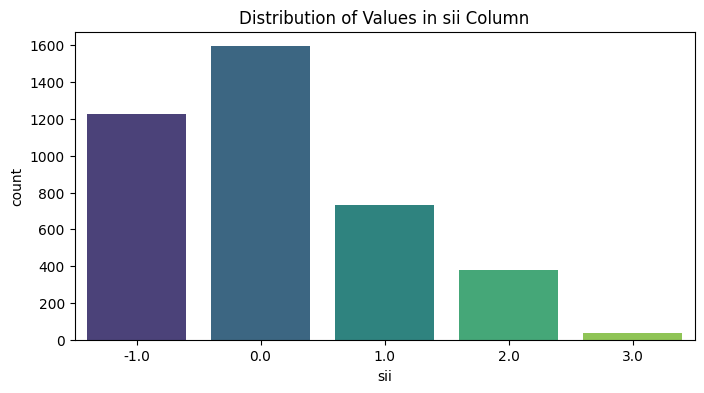

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot the distribution
plt.figure(figsize=(8, 4))
sns.countplot(x='sii', data=df_train, palette='viridis')
plt.title('Distribution of Values in sii Column')
plt.show()

In [15]:
df_train_2 = df_train.drop(['PCIAT-Season', 'PCIAT-PCIAT_01', 'PCIAT-PCIAT_02',
       'PCIAT-PCIAT_03', 'PCIAT-PCIAT_04', 'PCIAT-PCIAT_05', 'PCIAT-PCIAT_06',
       'PCIAT-PCIAT_07', 'PCIAT-PCIAT_08', 'PCIAT-PCIAT_09', 'PCIAT-PCIAT_10',
       'PCIAT-PCIAT_11', 'PCIAT-PCIAT_12', 'PCIAT-PCIAT_13', 'PCIAT-PCIAT_14',
       'PCIAT-PCIAT_15', 'PCIAT-PCIAT_16', 'PCIAT-PCIAT_17', 'PCIAT-PCIAT_18',
       'PCIAT-PCIAT_19', 'PCIAT-PCIAT_20', 'PCIAT-PCIAT_Total'],axis=1)

In [16]:
df_train 

,id,Basic_Demos-Enroll_Season,Basic_Demos-Age,Basic_Demos-Sex,CGAS-Season,CGAS-CGAS_Score,Physical-Season,Physical-BMI,Physical-Height,Physical-Weight,...,PCIAT-PCIAT_18,PCIAT-PCIAT_19,PCIAT-PCIAT_20,PCIAT-PCIAT_Total,SDS-Season,SDS-SDS_Total_Raw,SDS-SDS_Total_T,PreInt_EduHx-Season,PreInt_EduHx-computerinternet_hoursday,sii
0,00008ff9,Fall,5,0,Winter,51.0,Fall,16.877316,46.0,50.8,...,4.0,2.0,4.0,55.0,NaN,NaN,NaN,Fall,3.0,2.0
1,000fd460,Summer,9,0,NaN,NaN,Fall,14.035590,48.0,46.0,...,0.0,0.0,0.0,0.0,Fall,46.0,64.0,Summer,0.0,0.0
2,00105258,Summer,10,1,Fall,71.0,Fall,16.648696,56.5,75.6,...,2.0,1.0,1.0,28.0,Fall,38.0,54.0,Summer,2.0,0.0
3,00115b9f,Winter,9,0,Fall,71.0,Summer,18.292347,56.0,81.6,...,3.0,4.0,1.0,44.0,Summer,31.0,45.0,Winter,0.0,1.0
4,0016bb22,Spring,18,1,Summer,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3955,ff8a2de4,Fall,13,0,Spring,60.0,Fall,16.362460,59.5,82.4,...,1.0,1.0,0.0,32.0,Winter,35.0,50.0,Fall,1.0,1.0
3956,ffa9794a,Winter,10,0,NaN,NaN,Spring,18.764678,53.5,76.4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Winter,0.0,-1.0
3957,ffcd4dbd,Fall,11,0,Spring,68.0,Winter,21.441500,60.0,109.8,...,1.0,0.0,1.0,31.0,Winter,56.0,77.0,Fall,0.0,1.0
3958,ffed1dd5,Spring,13,0,Spring,70.0,Winter,12.235895,70.7,87.0,...,1.0,1.0,1.0,19.0,Spring,33.0,47.0,Spring,1.0,0.0


In [17]:
# # Separate categorical columns
# categorical_cols = df_train.select_dtypes(include=['object', 'category']).columns.tolist()

# # Separate numerical columns
# numerical_cols = df_train.select_dtypes(include=['number']).columns.tolist()

In [18]:
# df_train_2

In [19]:
# # Separate categorical columns
# categorical_cols2 = df_train_2.select_dtypes(include=['object', 'category']).columns.tolist()

# # Separate numerical columns
# numerical_cols2 = df_train_2.select_dtypes(include=['number']).columns.tolist()

In [20]:
# categorical_cols

In [21]:
# df_train[categorical_cols]

In [22]:
# df_train[numerical_cols]

In [23]:
df_train_cpy = df_train.copy()

In [24]:
df_train_cpy

,id,Basic_Demos-Enroll_Season,Basic_Demos-Age,Basic_Demos-Sex,CGAS-Season,CGAS-CGAS_Score,Physical-Season,Physical-BMI,Physical-Height,Physical-Weight,...,PCIAT-PCIAT_18,PCIAT-PCIAT_19,PCIAT-PCIAT_20,PCIAT-PCIAT_Total,SDS-Season,SDS-SDS_Total_Raw,SDS-SDS_Total_T,PreInt_EduHx-Season,PreInt_EduHx-computerinternet_hoursday,sii
0,00008ff9,Fall,5,0,Winter,51.0,Fall,16.877316,46.0,50.8,...,4.0,2.0,4.0,55.0,NaN,NaN,NaN,Fall,3.0,2.0
1,000fd460,Summer,9,0,NaN,NaN,Fall,14.035590,48.0,46.0,...,0.0,0.0,0.0,0.0,Fall,46.0,64.0,Summer,0.0,0.0
2,00105258,Summer,10,1,Fall,71.0,Fall,16.648696,56.5,75.6,...,2.0,1.0,1.0,28.0,Fall,38.0,54.0,Summer,2.0,0.0
3,00115b9f,Winter,9,0,Fall,71.0,Summer,18.292347,56.0,81.6,...,3.0,4.0,1.0,44.0,Summer,31.0,45.0,Winter,0.0,1.0
4,0016bb22,Spring,18,1,Summer,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3955,ff8a2de4,Fall,13,0,Spring,60.0,Fall,16.362460,59.5,82.4,...,1.0,1.0,0.0,32.0,Winter,35.0,50.0,Fall,1.0,1.0
3956,ffa9794a,Winter,10,0,NaN,NaN,Spring,18.764678,53.5,76.4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Winter,0.0,-1.0
3957,ffcd4dbd,Fall,11,0,Spring,68.0,Winter,21.441500,60.0,109.8,...,1.0,0.0,1.0,31.0,Winter,56.0,77.0,Fall,0.0,1.0
3958,ffed1dd5,Spring,13,0,Spring,70.0,Winter,12.235895,70.7,87.0,...,1.0,1.0,1.0,19.0,Spring,33.0,47.0,Spring,1.0,0.0


In [25]:
df_train_cpy['PCIAT-PCIAT_Total'].fillna(-1,inplace=True) 

In [26]:
df_train_cpy

,id,Basic_Demos-Enroll_Season,Basic_Demos-Age,Basic_Demos-Sex,CGAS-Season,CGAS-CGAS_Score,Physical-Season,Physical-BMI,Physical-Height,Physical-Weight,...,PCIAT-PCIAT_18,PCIAT-PCIAT_19,PCIAT-PCIAT_20,PCIAT-PCIAT_Total,SDS-Season,SDS-SDS_Total_Raw,SDS-SDS_Total_T,PreInt_EduHx-Season,PreInt_EduHx-computerinternet_hoursday,sii
0,00008ff9,Fall,5,0,Winter,51.0,Fall,16.877316,46.0,50.8,...,4.0,2.0,4.0,55.0,NaN,NaN,NaN,Fall,3.0,2.0
1,000fd460,Summer,9,0,NaN,NaN,Fall,14.035590,48.0,46.0,...,0.0,0.0,0.0,0.0,Fall,46.0,64.0,Summer,0.0,0.0
2,00105258,Summer,10,1,Fall,71.0,Fall,16.648696,56.5,75.6,...,2.0,1.0,1.0,28.0,Fall,38.0,54.0,Summer,2.0,0.0
3,00115b9f,Winter,9,0,Fall,71.0,Summer,18.292347,56.0,81.6,...,3.0,4.0,1.0,44.0,Summer,31.0,45.0,Winter,0.0,1.0
4,0016bb22,Spring,18,1,Summer,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,-1.0,NaN,NaN,NaN,NaN,NaN,-1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3955,ff8a2de4,Fall,13,0,Spring,60.0,Fall,16.362460,59.5,82.4,...,1.0,1.0,0.0,32.0,Winter,35.0,50.0,Fall,1.0,1.0
3956,ffa9794a,Winter,10,0,NaN,NaN,Spring,18.764678,53.5,76.4,...,NaN,NaN,NaN,-1.0,NaN,NaN,NaN,Winter,0.0,-1.0
3957,ffcd4dbd,Fall,11,0,Spring,68.0,Winter,21.441500,60.0,109.8,...,1.0,0.0,1.0,31.0,Winter,56.0,77.0,Fall,0.0,1.0
3958,ffed1dd5,Spring,13,0,Spring,70.0,Winter,12.235895,70.7,87.0,...,1.0,1.0,1.0,19.0,Spring,33.0,47.0,Spring,1.0,0.0


In [27]:
df_train_cpy['PCIAT-PCIAT_Total'].isna().sum()

0

In [28]:
import pandas as pd
from sklearn.impute import SimpleImputer

In [29]:
df_train_cpy_4 = df_train_cpy[df_train_cpy['sii'] != -1]

In [30]:
df_train_cpy_4.shape

(2736, 82)

In [31]:
df_train_cpy_4

,id,Basic_Demos-Enroll_Season,Basic_Demos-Age,Basic_Demos-Sex,CGAS-Season,CGAS-CGAS_Score,Physical-Season,Physical-BMI,Physical-Height,Physical-Weight,...,PCIAT-PCIAT_18,PCIAT-PCIAT_19,PCIAT-PCIAT_20,PCIAT-PCIAT_Total,SDS-Season,SDS-SDS_Total_Raw,SDS-SDS_Total_T,PreInt_EduHx-Season,PreInt_EduHx-computerinternet_hoursday,sii
0,00008ff9,Fall,5,0,Winter,51.0,Fall,16.877316,46.0,50.8,...,4.0,2.0,4.0,55.0,NaN,NaN,NaN,Fall,3.0,2.0
1,000fd460,Summer,9,0,NaN,NaN,Fall,14.035590,48.0,46.0,...,0.0,0.0,0.0,0.0,Fall,46.0,64.0,Summer,0.0,0.0
2,00105258,Summer,10,1,Fall,71.0,Fall,16.648696,56.5,75.6,...,2.0,1.0,1.0,28.0,Fall,38.0,54.0,Summer,2.0,0.0
3,00115b9f,Winter,9,0,Fall,71.0,Summer,18.292347,56.0,81.6,...,3.0,4.0,1.0,44.0,Summer,31.0,45.0,Winter,0.0,1.0
5,001f3379,Spring,13,1,Winter,50.0,Summer,22.279952,59.5,112.2,...,1.0,2.0,1.0,34.0,Summer,40.0,56.0,Spring,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3953,ff6c2bb8,Fall,8,0,NaN,NaN,Fall,17.139810,52.5,67.2,...,2.0,2.0,1.0,22.0,Fall,41.0,58.0,Fall,2.0,0.0
3954,ff759544,Summer,7,1,NaN,NaN,Summer,13.927006,48.5,46.6,...,3.0,3.0,0.0,33.0,Summer,48.0,67.0,Summer,0.0,1.0
3955,ff8a2de4,Fall,13,0,Spring,60.0,Fall,16.362460,59.5,82.4,...,1.0,1.0,0.0,32.0,Winter,35.0,50.0,Fall,1.0,1.0
3957,ffcd4dbd,Fall,11,0,Spring,68.0,Winter,21.441500,60.0,109.8,...,1.0,0.0,1.0,31.0,Winter,56.0,77.0,Fall,0.0,1.0


In [32]:
# # Create Simple Imputer for numerical features with median strategy
# num_imputer = SimpleImputer(strategy='median')

# # Apply the imputer to numerical features
# df_train_cpy_4[numerical_cols] = num_imputer.fit_transform(df_train_cpy_4[numerical_cols])

In [33]:
# df_train_cpy_4[numerical_cols]

In [34]:
# cat_imputer = SimpleImputer(strategy='most_frequent')

In [35]:
# df_train_cpy_4[categorical_cols] = cat_imputer.fit_transform(df_train_cpy_4[categorical_cols])

In [36]:
# df_train_cpy_4[categorical_cols]

In [37]:
# category_mapping = {'Fall': 0, 'Spring': 1, 'Summer': 2, 'Winter': 3}

In [38]:
# for cols in categorical_cols : 
#     df_train_cpy_4[cols] = df_train_cpy_4[cols].map(category_mapping)

In [39]:
# df_train_cpy_4[categorical_cols]

In [40]:
df_train_cpy_4

,id,Basic_Demos-Enroll_Season,Basic_Demos-Age,Basic_Demos-Sex,CGAS-Season,CGAS-CGAS_Score,Physical-Season,Physical-BMI,Physical-Height,Physical-Weight,...,PCIAT-PCIAT_18,PCIAT-PCIAT_19,PCIAT-PCIAT_20,PCIAT-PCIAT_Total,SDS-Season,SDS-SDS_Total_Raw,SDS-SDS_Total_T,PreInt_EduHx-Season,PreInt_EduHx-computerinternet_hoursday,sii
0,00008ff9,Fall,5,0,Winter,51.0,Fall,16.877316,46.0,50.8,...,4.0,2.0,4.0,55.0,NaN,NaN,NaN,Fall,3.0,2.0
1,000fd460,Summer,9,0,NaN,NaN,Fall,14.035590,48.0,46.0,...,0.0,0.0,0.0,0.0,Fall,46.0,64.0,Summer,0.0,0.0
2,00105258,Summer,10,1,Fall,71.0,Fall,16.648696,56.5,75.6,...,2.0,1.0,1.0,28.0,Fall,38.0,54.0,Summer,2.0,0.0
3,00115b9f,Winter,9,0,Fall,71.0,Summer,18.292347,56.0,81.6,...,3.0,4.0,1.0,44.0,Summer,31.0,45.0,Winter,0.0,1.0
5,001f3379,Spring,13,1,Winter,50.0,Summer,22.279952,59.5,112.2,...,1.0,2.0,1.0,34.0,Summer,40.0,56.0,Spring,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3953,ff6c2bb8,Fall,8,0,NaN,NaN,Fall,17.139810,52.5,67.2,...,2.0,2.0,1.0,22.0,Fall,41.0,58.0,Fall,2.0,0.0
3954,ff759544,Summer,7,1,NaN,NaN,Summer,13.927006,48.5,46.6,...,3.0,3.0,0.0,33.0,Summer,48.0,67.0,Summer,0.0,1.0
3955,ff8a2de4,Fall,13,0,Spring,60.0,Fall,16.362460,59.5,82.4,...,1.0,1.0,0.0,32.0,Winter,35.0,50.0,Fall,1.0,1.0
3957,ffcd4dbd,Fall,11,0,Spring,68.0,Winter,21.441500,60.0,109.8,...,1.0,0.0,1.0,31.0,Winter,56.0,77.0,Fall,0.0,1.0


In [41]:
# df_train_cpy_4['id'] = df_train['id']

In [42]:
# df_train_cpy_4.drop('id',axis=1).corr()['PCIAT-PCIAT_Total']

In [43]:
# corr_total = df_train_cpy_4.drop('id',axis=1).corr()['PCIAT-PCIAT_Total']

# for column, count in corr_total.items():
#     print(f'{column}: {count}')

In [44]:
df_train_cpy_4['PCIAT-PCIAT_18'].value_counts()

PCIAT-PCIAT_18
0.0    824
1.0    661
2.0    585
3.0    250
4.0    219
5.0    189
Name: count, dtype: int64

In [45]:
df_train_cpy_4['sii'].value_counts()

sii
0.0    1594
1.0     730
2.0     378
3.0      34
Name: count, dtype: int64

In [46]:
# df_train_cpy_2 = df_train_cpy[df_train_cpy['sii'] != -1 ]

In [47]:
# df_train_cpy_2 

In [48]:
from xgboost import XGBClassifier

In [49]:
df_train_cpy_4.drop('sii',axis=1,inplace=True)

In [50]:
df_train_cpy_4.columns

Index(['id', 'Basic_Demos-Enroll_Season', 'Basic_Demos-Age', 'Basic_Demos-Sex',
       'CGAS-Season', 'CGAS-CGAS_Score', 'Physical-Season', 'Physical-BMI',
       'Physical-Height', 'Physical-Weight', 'Physical-Waist_Circumference',
       'Physical-Diastolic_BP', 'Physical-HeartRate', 'Physical-Systolic_BP',
       'Fitness_Endurance-Season', 'Fitness_Endurance-Max_Stage',
       'Fitness_Endurance-Time_Mins', 'Fitness_Endurance-Time_Sec',
       'FGC-Season', 'FGC-FGC_CU', 'FGC-FGC_CU_Zone', 'FGC-FGC_GSND',
       'FGC-FGC_GSND_Zone', 'FGC-FGC_GSD', 'FGC-FGC_GSD_Zone', 'FGC-FGC_PU',
       'FGC-FGC_PU_Zone', 'FGC-FGC_SRL', 'FGC-FGC_SRL_Zone', 'FGC-FGC_SRR',
       'FGC-FGC_SRR_Zone', 'FGC-FGC_TL', 'FGC-FGC_TL_Zone', 'BIA-Season',
       'BIA-BIA_Activity_Level_num', 'BIA-BIA_BMC', 'BIA-BIA_BMI',
       'BIA-BIA_BMR', 'BIA-BIA_DEE', 'BIA-BIA_ECW', 'BIA-BIA_FFM',
       'BIA-BIA_FFMI', 'BIA-BIA_FMI', 'BIA-BIA_Fat', 'BIA-BIA_Frame_num',
       'BIA-BIA_ICW', 'BIA-BIA_LDM', 'BIA-BIA_LST'

In [51]:
df_train_cpy_5 = df_train_cpy_4.copy()

In [52]:
df_train_cpy_5['sii'] = df_train['sii']

In [53]:
df_train_cpy_5

,id,Basic_Demos-Enroll_Season,Basic_Demos-Age,Basic_Demos-Sex,CGAS-Season,CGAS-CGAS_Score,Physical-Season,Physical-BMI,Physical-Height,Physical-Weight,...,PCIAT-PCIAT_18,PCIAT-PCIAT_19,PCIAT-PCIAT_20,PCIAT-PCIAT_Total,SDS-Season,SDS-SDS_Total_Raw,SDS-SDS_Total_T,PreInt_EduHx-Season,PreInt_EduHx-computerinternet_hoursday,sii
0,00008ff9,Fall,5,0,Winter,51.0,Fall,16.877316,46.0,50.8,...,4.0,2.0,4.0,55.0,NaN,NaN,NaN,Fall,3.0,2.0
1,000fd460,Summer,9,0,NaN,NaN,Fall,14.035590,48.0,46.0,...,0.0,0.0,0.0,0.0,Fall,46.0,64.0,Summer,0.0,0.0
2,00105258,Summer,10,1,Fall,71.0,Fall,16.648696,56.5,75.6,...,2.0,1.0,1.0,28.0,Fall,38.0,54.0,Summer,2.0,0.0
3,00115b9f,Winter,9,0,Fall,71.0,Summer,18.292347,56.0,81.6,...,3.0,4.0,1.0,44.0,Summer,31.0,45.0,Winter,0.0,1.0
5,001f3379,Spring,13,1,Winter,50.0,Summer,22.279952,59.5,112.2,...,1.0,2.0,1.0,34.0,Summer,40.0,56.0,Spring,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3953,ff6c2bb8,Fall,8,0,NaN,NaN,Fall,17.139810,52.5,67.2,...,2.0,2.0,1.0,22.0,Fall,41.0,58.0,Fall,2.0,0.0
3954,ff759544,Summer,7,1,NaN,NaN,Summer,13.927006,48.5,46.6,...,3.0,3.0,0.0,33.0,Summer,48.0,67.0,Summer,0.0,1.0
3955,ff8a2de4,Fall,13,0,Spring,60.0,Fall,16.362460,59.5,82.4,...,1.0,1.0,0.0,32.0,Winter,35.0,50.0,Fall,1.0,1.0
3957,ffcd4dbd,Fall,11,0,Spring,68.0,Winter,21.441500,60.0,109.8,...,1.0,0.0,1.0,31.0,Winter,56.0,77.0,Fall,0.0,1.0


In [54]:
df_train_cpy_5[['PCIAT-PCIAT_01', 'PCIAT-PCIAT_02',
       'PCIAT-PCIAT_03', 'PCIAT-PCIAT_04', 'PCIAT-PCIAT_05', 'PCIAT-PCIAT_06',
       'PCIAT-PCIAT_07', 'PCIAT-PCIAT_08', 'PCIAT-PCIAT_09', 'PCIAT-PCIAT_10',
       'PCIAT-PCIAT_11', 'PCIAT-PCIAT_12', 'PCIAT-PCIAT_13', 'PCIAT-PCIAT_14',
       'PCIAT-PCIAT_15', 'PCIAT-PCIAT_16', 'PCIAT-PCIAT_17', 'PCIAT-PCIAT_18',
       'PCIAT-PCIAT_19', 'PCIAT-PCIAT_20','PCIAT-PCIAT_Total','sii']].corr()['sii'][['PCIAT-PCIAT_01', 'PCIAT-PCIAT_02',
       'PCIAT-PCIAT_03', 'PCIAT-PCIAT_04', 'PCIAT-PCIAT_05', 'PCIAT-PCIAT_06',
       'PCIAT-PCIAT_07', 'PCIAT-PCIAT_08', 'PCIAT-PCIAT_09', 'PCIAT-PCIAT_10',
       'PCIAT-PCIAT_11', 'PCIAT-PCIAT_12', 'PCIAT-PCIAT_13', 'PCIAT-PCIAT_14',
       'PCIAT-PCIAT_15', 'PCIAT-PCIAT_16', 'PCIAT-PCIAT_17', 'PCIAT-PCIAT_18',
       'PCIAT-PCIAT_19', 'PCIAT-PCIAT_20','PCIAT-PCIAT_Total']]

PCIAT-PCIAT_01       0.617883
PCIAT-PCIAT_02       0.694597
PCIAT-PCIAT_03       0.694736
PCIAT-PCIAT_04       0.589342
PCIAT-PCIAT_05       0.722722
PCIAT-PCIAT_06       0.645596
PCIAT-PCIAT_07       0.460864
PCIAT-PCIAT_08       0.695458
PCIAT-PCIAT_09       0.660485
PCIAT-PCIAT_10       0.689972
PCIAT-PCIAT_11       0.609964
PCIAT-PCIAT_12       0.370844
PCIAT-PCIAT_13       0.705679
PCIAT-PCIAT_14       0.675953
PCIAT-PCIAT_15       0.751399
PCIAT-PCIAT_16       0.698566
PCIAT-PCIAT_17       0.729867
PCIAT-PCIAT_18       0.731112
PCIAT-PCIAT_19       0.683293
PCIAT-PCIAT_20       0.703013
PCIAT-PCIAT_Total    0.899681
Name: sii, dtype: float64

In [55]:
# import lightgbm as lgb
# import xgboost as xgb
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.metrics import accuracy_score
# from sklearn.model_selection import train_test_split

# # Assuming X contains the features and Y contains the target variables
# X = df_train_cpy_4.drop(['PCIAT-PCIAT_01', 'PCIAT-PCIAT_02',
#        'PCIAT-PCIAT_03', 'PCIAT-PCIAT_04', 'PCIAT-PCIAT_05', 'PCIAT-PCIAT_06',
#        'PCIAT-PCIAT_07', 'PCIAT-PCIAT_08', 'PCIAT-PCIAT_09', 'PCIAT-PCIAT_10',
#        'PCIAT-PCIAT_11', 'PCIAT-PCIAT_12', 'PCIAT-PCIAT_13', 'PCIAT-PCIAT_14',
#        'PCIAT-PCIAT_15', 'PCIAT-PCIAT_16', 'PCIAT-PCIAT_17', 'PCIAT-PCIAT_18',
#        'PCIAT-PCIAT_19', 'PCIAT-PCIAT_20','id','PCIAT-PCIAT_Total','PCIAT-Season'], axis=1)
# Y = df_train_cpy_4[['PCIAT-PCIAT_01', 'PCIAT-PCIAT_02',
#        'PCIAT-PCIAT_03', 'PCIAT-PCIAT_04', 'PCIAT-PCIAT_05', 'PCIAT-PCIAT_06',
#        'PCIAT-PCIAT_07', 'PCIAT-PCIAT_08', 'PCIAT-PCIAT_09', 'PCIAT-PCIAT_10',
#        'PCIAT-PCIAT_11', 'PCIAT-PCIAT_12', 'PCIAT-PCIAT_13', 'PCIAT-PCIAT_14',
#        'PCIAT-PCIAT_15', 'PCIAT-PCIAT_16', 'PCIAT-PCIAT_17', 'PCIAT-PCIAT_18',
#        'PCIAT-PCIAT_19', 'PCIAT-PCIAT_20']]

# # Split once for all models
# X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# models = {'LightGBM': {}, 'XGBoost': {}, 'RandomForest': {}}

# for target in Y.columns:
#     # LightGBM
#     lgb_model = lgb.LGBMClassifier()
#     lgb_model.fit(X_train, y_train[target])
#     lgb_pred = lgb_model.predict(X_test)
#     lgb_acc = accuracy_score(y_test[target], lgb_pred)
#     models['LightGBM'][target] = lgb_model
#     print(f"LightGBM Model for {target}: Accuracy = {lgb_acc}")

#     # XGBoost
#     xgb_model = xgb.XGBClassifier()
#     xgb_model.fit(X_train, y_train[target])
#     xgb_pred = xgb_model.predict(X_test)
#     xgb_acc = accuracy_score(y_test[target], xgb_pred)
#     models['XGBoost'][target] = xgb_model
#     print(f"XGBoost Model for {target}: Accuracy = {xgb_acc}")

#     # Random Forest
#     rf_model = RandomForestClassifier()
#     rf_model.fit(X_train, y_train[target])
#     rf_pred = rf_model.predict(X_test)
#     rf_acc = accuracy_score(y_test[target], rf_pred)
#     models['RandomForest'][target] = rf_model
#     print(f"Random Forest Model for {target}: Accuracy = {rf_acc}")

In [56]:
# import lightgbm as lgb
# import xgboost as xgb
# from sklearn.ensemble import RandomForestClassifier, VotingClassifier
# from sklearn.metrics import accuracy_score
# from sklearn.model_selection import train_test_split
# import pandas as pd

# # Assuming X contains the features and Y contains the target variables
# # If your target variables are continuous, you may need to bin them into categories
# # Assuming X contains the features and Y contains the target variables
# X = df_train_cpy_4.drop(['PCIAT-PCIAT_01', 'PCIAT-PCIAT_02',
#        'PCIAT-PCIAT_03', 'PCIAT-PCIAT_04', 'PCIAT-PCIAT_05', 'PCIAT-PCIAT_06',
#        'PCIAT-PCIAT_07', 'PCIAT-PCIAT_08', 'PCIAT-PCIAT_09', 'PCIAT-PCIAT_10',
#        'PCIAT-PCIAT_11', 'PCIAT-PCIAT_12', 'PCIAT-PCIAT_13', 'PCIAT-PCIAT_14',
#        'PCIAT-PCIAT_15', 'PCIAT-PCIAT_16', 'PCIAT-PCIAT_17', 'PCIAT-PCIAT_18',
#        'PCIAT-PCIAT_19', 'PCIAT-PCIAT_20','id','PCIAT-PCIAT_Total','PCIAT-Season'], axis=1)
# Y = df_train_cpy_4[['PCIAT-PCIAT_01', 'PCIAT-PCIAT_02',
#        'PCIAT-PCIAT_03', 'PCIAT-PCIAT_04', 'PCIAT-PCIAT_05', 'PCIAT-PCIAT_06',
#        'PCIAT-PCIAT_07', 'PCIAT-PCIAT_08', 'PCIAT-PCIAT_09', 'PCIAT-PCIAT_10',
#        'PCIAT-PCIAT_11', 'PCIAT-PCIAT_12', 'PCIAT-PCIAT_13', 'PCIAT-PCIAT_14',
#        'PCIAT-PCIAT_15', 'PCIAT-PCIAT_16', 'PCIAT-PCIAT_17', 'PCIAT-PCIAT_18',
#        'PCIAT-PCIAT_19', 'PCIAT-PCIAT_20']]


# # Split the data
# X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# # Voting classifier results for each target variable
# voting_models = {}

# for target in Y.columns:
#     # Individual Models
#     lgb_model = lgb.LGBMClassifier()
#     xgb_model = xgb.XGBClassifier()
#     rf_model = RandomForestClassifier()

#     # Voting Classifier - combines all three models
#     voting_clf = VotingClassifier(estimators=[
#         ('lightgbm', lgb_model),
#         ('xgboost', xgb_model),
#         ('random_forest', rf_model)
#     ], voting='hard')  # 'hard' voting is for majority voting

#     # Fit the voting classifier
#     voting_clf.fit(X_train, y_train[target])
    
#     # Make predictions
#     voting_pred = voting_clf.predict(X_test)
    
#     # Evaluate using accuracy
#     accuracy = accuracy_score(y_test[target], voting_pred)
    
#     voting_models[target] = voting_clf
#     print(f"Voting Classifier for {target}: Accuracy = {accuracy}")

In [57]:
def quadratic_weighted_kappa(y_true, y_pred, N=6):
    O = confusion_matrix(y_true, y_pred, labels=np.arange(N))
    
    W = np.zeros((N, N))
    for i in range(N):
        for j in range(N):
            W[i, j] = ((i - j) ** 2) / (N - 1) ** 2
    
    hist_actual = np.bincount(y_true, minlength=N)
    hist_pred = np.bincount(y_pred.astype(int), minlength=N)  # Ensure this is also int

    E = np.outer(hist_actual, hist_pred)
    E = E / E.sum() * O.sum()  # Normalize E to have the same sum as O
    
    num = np.sum(W * O)
    denom = np.sum(W * E)
    
    kappa = 1 - (num / denom)
    
    return kappa


In [58]:
df_train_cpy_4

,id,Basic_Demos-Enroll_Season,Basic_Demos-Age,Basic_Demos-Sex,CGAS-Season,CGAS-CGAS_Score,Physical-Season,Physical-BMI,Physical-Height,Physical-Weight,...,PCIAT-PCIAT_17,PCIAT-PCIAT_18,PCIAT-PCIAT_19,PCIAT-PCIAT_20,PCIAT-PCIAT_Total,SDS-Season,SDS-SDS_Total_Raw,SDS-SDS_Total_T,PreInt_EduHx-Season,PreInt_EduHx-computerinternet_hoursday
0,00008ff9,Fall,5,0,Winter,51.0,Fall,16.877316,46.0,50.8,...,4.0,4.0,2.0,4.0,55.0,NaN,NaN,NaN,Fall,3.0
1,000fd460,Summer,9,0,NaN,NaN,Fall,14.035590,48.0,46.0,...,0.0,0.0,0.0,0.0,0.0,Fall,46.0,64.0,Summer,0.0
2,00105258,Summer,10,1,Fall,71.0,Fall,16.648696,56.5,75.6,...,2.0,2.0,1.0,1.0,28.0,Fall,38.0,54.0,Summer,2.0
3,00115b9f,Winter,9,0,Fall,71.0,Summer,18.292347,56.0,81.6,...,4.0,3.0,4.0,1.0,44.0,Summer,31.0,45.0,Winter,0.0
5,001f3379,Spring,13,1,Winter,50.0,Summer,22.279952,59.5,112.2,...,3.0,1.0,2.0,1.0,34.0,Summer,40.0,56.0,Spring,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3953,ff6c2bb8,Fall,8,0,NaN,NaN,Fall,17.139810,52.5,67.2,...,0.0,2.0,2.0,1.0,22.0,Fall,41.0,58.0,Fall,2.0
3954,ff759544,Summer,7,1,NaN,NaN,Summer,13.927006,48.5,46.6,...,3.0,3.0,3.0,0.0,33.0,Summer,48.0,67.0,Summer,0.0
3955,ff8a2de4,Fall,13,0,Spring,60.0,Fall,16.362460,59.5,82.4,...,2.0,1.0,1.0,0.0,32.0,Winter,35.0,50.0,Fall,1.0
3957,ffcd4dbd,Fall,11,0,Spring,68.0,Winter,21.441500,60.0,109.8,...,1.0,1.0,0.0,1.0,31.0,Winter,56.0,77.0,Fall,0.0


In [59]:
# import lightgbm as lgb
# import xgboost as xgb
# from sklearn.ensemble import RandomForestClassifier, VotingClassifier
# from sklearn.metrics import accuracy_score, confusion_matrix
# import pandas as pd
# import numpy as np
# from sklearn.model_selection import train_test_split



# X = df_train_cpy_4.drop(['PCIAT-PCIAT_01', 'PCIAT-PCIAT_02',
#        'PCIAT-PCIAT_03', 'PCIAT-PCIAT_04', 'PCIAT-PCIAT_05', 'PCIAT-PCIAT_06',
#        'PCIAT-PCIAT_07', 'PCIAT-PCIAT_08', 'PCIAT-PCIAT_09', 'PCIAT-PCIAT_10',
#        'PCIAT-PCIAT_11', 'PCIAT-PCIAT_12', 'PCIAT-PCIAT_13', 'PCIAT-PCIAT_14',
#        'PCIAT-PCIAT_15', 'PCIAT-PCIAT_16', 'PCIAT-PCIAT_17', 'PCIAT-PCIAT_18',
#        'PCIAT-PCIAT_19', 'PCIAT-PCIAT_20','id','PCIAT-PCIAT_Total','PCIAT-Season'], axis=1)
# Y = df_train_cpy_4[['PCIAT-PCIAT_01', 'PCIAT-PCIAT_02',
#        'PCIAT-PCIAT_03', 'PCIAT-PCIAT_04', 'PCIAT-PCIAT_05', 'PCIAT-PCIAT_06',
#        'PCIAT-PCIAT_07', 'PCIAT-PCIAT_08', 'PCIAT-PCIAT_09', 'PCIAT-PCIAT_10',
#        'PCIAT-PCIAT_11', 'PCIAT-PCIAT_12', 'PCIAT-PCIAT_13', 'PCIAT-PCIAT_14',
#        'PCIAT-PCIAT_15', 'PCIAT-PCIAT_16', 'PCIAT-PCIAT_17', 'PCIAT-PCIAT_18',
#        'PCIAT-PCIAT_19', 'PCIAT-PCIAT_20']]

# # Split the data
# X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# # Voting classifier results for each target variable
# voting_models = {}

# for target in Y.columns:
#     # Individual Models
#     lgb_model = lgb.LGBMClassifier()
# #     xgb_model = xgb.XGBClassifier()
# #     rf_model = RandomForestClassifier()

#     # Voting Classifier - combines all three models
#     voting_clf = VotingClassifier(estimators=[
#         ('lightgbm', lgb_model),
# #         ('xgboost', xgb_model),
# #         ('random_forest', rf_model)
#     ], voting='hard')  # 'hard' voting is for majority voting

#     # Fit the voting classifier
#     voting_clf.fit(X_train, y_train[target])
    
#     # Make predictions
#     y_pred_classes = voting_clf.predict(X_test)
    
#     # Evaluate using accuracy
#     accuracy = accuracy_score(y_test[target], y_pred_classes)
#     print(f"Voting Classifier for {target}: Accuracy = {accuracy}")
    
#     # Evaluate using Quadratic Weighted Kappa
#     kappa_score = quadratic_weighted_kappa(y_test[target], y_pred_classes, N=6)
#     print(f"Quadratic Weighted Kappa for {target}: {kappa_score}")
    
#     # Save the model
#     voting_models[target] = voting_clf

In [60]:
df_test

,id,Basic_Demos-Enroll_Season,Basic_Demos-Age,Basic_Demos-Sex,CGAS-Season,CGAS-CGAS_Score,Physical-Season,Physical-BMI,Physical-Height,Physical-Weight,...,BIA-BIA_TBW,PAQ_A-Season,PAQ_A-PAQ_A_Total,PAQ_C-Season,PAQ_C-PAQ_C_Total,SDS-Season,SDS-SDS_Total_Raw,SDS-SDS_Total_T,PreInt_EduHx-Season,PreInt_EduHx-computerinternet_hoursday
0,00008ff9,Fall,5,0,Winter,51.0,Fall,16.877316,46.00,50.8,...,32.6909,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Fall,3.0
1,000fd460,Summer,9,0,NaN,NaN,Fall,14.035590,48.00,46.0,...,27.0552,NaN,NaN,Fall,2.340,Fall,46.0,64.0,Summer,0.0
2,00105258,Summer,10,1,Fall,71.0,Fall,16.648696,56.50,75.6,...,NaN,NaN,NaN,Summer,2.170,Fall,38.0,54.0,Summer,2.0
3,00115b9f,Winter,9,0,Fall,71.0,Summer,18.292347,56.00,81.6,...,45.9966,NaN,NaN,Winter,2.451,Summer,31.0,45.0,Winter,0.0
4,0016bb22,Spring,18,1,Summer,NaN,NaN,NaN,NaN,NaN,...,NaN,Summer,1.04,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,001f3379,Spring,13,1,Winter,50.0,Summer,22.279952,59.50,112.2,...,63.1265,NaN,NaN,Spring,4.110,Summer,40.0,56.0,Spring,0.0
6,0038ba98,Fall,10,0,NaN,NaN,Fall,19.660760,55.00,84.6,...,47.2211,NaN,NaN,Winter,3.670,Winter,27.0,40.0,Fall,3.0
7,0068a485,Fall,10,1,NaN,NaN,Fall,16.861286,59.25,84.2,...,50.4767,NaN,NaN,Fall,1.270,NaN,NaN,NaN,Fall,2.0
8,0069fbed,Summer,15,0,NaN,NaN,Spring,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Summer,2.0
9,0083e397,Summer,19,1,Summer,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [61]:
df_test_cpy = df_test.copy()

In [62]:
# # Separate categorical columns
# categorical_cols_tt = df_test_cpy.select_dtypes(include=['object', 'category']).columns.tolist()

# # Separate numerical columns
# numerical_cols_tt = df_test_cpy.select_dtypes(include=['number']).columns.tolist()

In [63]:
df_train_cpy_5.columns

Index(['id', 'Basic_Demos-Enroll_Season', 'Basic_Demos-Age', 'Basic_Demos-Sex',
       'CGAS-Season', 'CGAS-CGAS_Score', 'Physical-Season', 'Physical-BMI',
       'Physical-Height', 'Physical-Weight', 'Physical-Waist_Circumference',
       'Physical-Diastolic_BP', 'Physical-HeartRate', 'Physical-Systolic_BP',
       'Fitness_Endurance-Season', 'Fitness_Endurance-Max_Stage',
       'Fitness_Endurance-Time_Mins', 'Fitness_Endurance-Time_Sec',
       'FGC-Season', 'FGC-FGC_CU', 'FGC-FGC_CU_Zone', 'FGC-FGC_GSND',
       'FGC-FGC_GSND_Zone', 'FGC-FGC_GSD', 'FGC-FGC_GSD_Zone', 'FGC-FGC_PU',
       'FGC-FGC_PU_Zone', 'FGC-FGC_SRL', 'FGC-FGC_SRL_Zone', 'FGC-FGC_SRR',
       'FGC-FGC_SRR_Zone', 'FGC-FGC_TL', 'FGC-FGC_TL_Zone', 'BIA-Season',
       'BIA-BIA_Activity_Level_num', 'BIA-BIA_BMC', 'BIA-BIA_BMI',
       'BIA-BIA_BMR', 'BIA-BIA_DEE', 'BIA-BIA_ECW', 'BIA-BIA_FFM',
       'BIA-BIA_FFMI', 'BIA-BIA_FMI', 'BIA-BIA_Fat', 'BIA-BIA_Frame_num',
       'BIA-BIA_ICW', 'BIA-BIA_LDM', 'BIA-BIA_LST'

In [64]:
df_train_cpy_6 = df_train.copy()

In [65]:
df_train_cpy_6.drop([ 'PCIAT-Season', 'PCIAT-PCIAT_01', 'PCIAT-PCIAT_02',
       'PCIAT-PCIAT_03', 'PCIAT-PCIAT_04', 'PCIAT-PCIAT_05', 'PCIAT-PCIAT_06',
       'PCIAT-PCIAT_07', 'PCIAT-PCIAT_08', 'PCIAT-PCIAT_09', 'PCIAT-PCIAT_10',
       'PCIAT-PCIAT_11', 'PCIAT-PCIAT_12', 'PCIAT-PCIAT_13', 'PCIAT-PCIAT_14',
       'PCIAT-PCIAT_15', 'PCIAT-PCIAT_16', 'PCIAT-PCIAT_17', 'PCIAT-PCIAT_18',
       'PCIAT-PCIAT_19', 'PCIAT-PCIAT_20', 'PCIAT-PCIAT_Total'],axis=1,inplace=True)

In [66]:
df_train_cpy_6.drop('sii',axis=1,inplace=True)

In [67]:
df_train_cpy_6

,id,Basic_Demos-Enroll_Season,Basic_Demos-Age,Basic_Demos-Sex,CGAS-Season,CGAS-CGAS_Score,Physical-Season,Physical-BMI,Physical-Height,Physical-Weight,...,BIA-BIA_TBW,PAQ_A-Season,PAQ_A-PAQ_A_Total,PAQ_C-Season,PAQ_C-PAQ_C_Total,SDS-Season,SDS-SDS_Total_Raw,SDS-SDS_Total_T,PreInt_EduHx-Season,PreInt_EduHx-computerinternet_hoursday
0,00008ff9,Fall,5,0,Winter,51.0,Fall,16.877316,46.0,50.8,...,32.6909,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Fall,3.0
1,000fd460,Summer,9,0,NaN,NaN,Fall,14.035590,48.0,46.0,...,27.0552,NaN,NaN,Fall,2.340,Fall,46.0,64.0,Summer,0.0
2,00105258,Summer,10,1,Fall,71.0,Fall,16.648696,56.5,75.6,...,NaN,NaN,NaN,Summer,2.170,Fall,38.0,54.0,Summer,2.0
3,00115b9f,Winter,9,0,Fall,71.0,Summer,18.292347,56.0,81.6,...,45.9966,NaN,NaN,Winter,2.451,Summer,31.0,45.0,Winter,0.0
4,0016bb22,Spring,18,1,Summer,NaN,NaN,NaN,NaN,NaN,...,NaN,Summer,1.04,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3955,ff8a2de4,Fall,13,0,Spring,60.0,Fall,16.362460,59.5,82.4,...,52.8320,NaN,NaN,Winter,3.260,Winter,35.0,50.0,Fall,1.0
3956,ffa9794a,Winter,10,0,NaN,NaN,Spring,18.764678,53.5,76.4,...,NaN,NaN,NaN,Winter,2.340,NaN,NaN,NaN,Winter,0.0
3957,ffcd4dbd,Fall,11,0,Spring,68.0,Winter,21.441500,60.0,109.8,...,54.4630,NaN,NaN,Winter,2.729,Winter,56.0,77.0,Fall,0.0
3958,ffed1dd5,Spring,13,0,Spring,70.0,Winter,12.235895,70.7,87.0,...,67.9038,NaN,NaN,Spring,3.300,Spring,33.0,47.0,Spring,1.0


In [68]:
# categorical_cols6 = df_train_cpy_6.select_dtypes(include=['object', 'category']).columns.tolist()

# # Separate numerical columns
# numerical_cols6 = df_train_cpy_6.select_dtypes(include=['number']).columns.tolist()

In [69]:
# # Create Simple Imputer for numerical features with median strategy
# num_imputer2 = SimpleImputer(strategy='median')

# # Apply the imputer to numerical features
# df_train_cpy_6[numerical_cols6] = num_imputer2.fit_transform(df_train_cpy_6[numerical_cols6])

In [70]:
df_train_cpy_6

,id,Basic_Demos-Enroll_Season,Basic_Demos-Age,Basic_Demos-Sex,CGAS-Season,CGAS-CGAS_Score,Physical-Season,Physical-BMI,Physical-Height,Physical-Weight,...,BIA-BIA_TBW,PAQ_A-Season,PAQ_A-PAQ_A_Total,PAQ_C-Season,PAQ_C-PAQ_C_Total,SDS-Season,SDS-SDS_Total_Raw,SDS-SDS_Total_T,PreInt_EduHx-Season,PreInt_EduHx-computerinternet_hoursday
0,00008ff9,Fall,5,0,Winter,51.0,Fall,16.877316,46.0,50.8,...,32.6909,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Fall,3.0
1,000fd460,Summer,9,0,NaN,NaN,Fall,14.035590,48.0,46.0,...,27.0552,NaN,NaN,Fall,2.340,Fall,46.0,64.0,Summer,0.0
2,00105258,Summer,10,1,Fall,71.0,Fall,16.648696,56.5,75.6,...,NaN,NaN,NaN,Summer,2.170,Fall,38.0,54.0,Summer,2.0
3,00115b9f,Winter,9,0,Fall,71.0,Summer,18.292347,56.0,81.6,...,45.9966,NaN,NaN,Winter,2.451,Summer,31.0,45.0,Winter,0.0
4,0016bb22,Spring,18,1,Summer,NaN,NaN,NaN,NaN,NaN,...,NaN,Summer,1.04,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3955,ff8a2de4,Fall,13,0,Spring,60.0,Fall,16.362460,59.5,82.4,...,52.8320,NaN,NaN,Winter,3.260,Winter,35.0,50.0,Fall,1.0
3956,ffa9794a,Winter,10,0,NaN,NaN,Spring,18.764678,53.5,76.4,...,NaN,NaN,NaN,Winter,2.340,NaN,NaN,NaN,Winter,0.0
3957,ffcd4dbd,Fall,11,0,Spring,68.0,Winter,21.441500,60.0,109.8,...,54.4630,NaN,NaN,Winter,2.729,Winter,56.0,77.0,Fall,0.0
3958,ffed1dd5,Spring,13,0,Spring,70.0,Winter,12.235895,70.7,87.0,...,67.9038,NaN,NaN,Spring,3.300,Spring,33.0,47.0,Spring,1.0


In [71]:
# # Apply the imputer to numerical features
# df_test_cpy[numerical_cols6] = num_imputer2.transform(df_test_cpy[numerical_cols6])

In [72]:
# for cols in categorical_cols : 
#     df_train_cpy_4[cols] = df_train_cpy_4[cols].map(category_mapping)

In [73]:
# cat_imputer2 = SimpleImputer(strategy='most_frequent')

In [74]:
# df_train_cpy_6[categorical_cols6] = cat_imputer2.fit_transform(df_train_cpy_6[categorical_cols6])

In [75]:
# df_test_cpy[categorical_cols6] = cat_imputer2.transform(df_test_cpy[categorical_cols6])

In [76]:
# category_mapping = {'Fall': 0, 'Spring': 1, 'Summer': 2, 'Winter': 3}

In [77]:
# for cols in categorical_cols6 : 
#     df_train_cpy_6[cols] = df_train_cpy_6[cols].map(category_mapping)

In [78]:
# for cols in categorical_cols6 : 
#     df_test_cpy[cols] = df_test_cpy[cols].map(category_mapping)

In [79]:
# df_test_cpy['id'] = df_test['id']

In [80]:
# df_train_cpy_6['id'] = df_train['id']

In [81]:
df_train_cpy_6

,id,Basic_Demos-Enroll_Season,Basic_Demos-Age,Basic_Demos-Sex,CGAS-Season,CGAS-CGAS_Score,Physical-Season,Physical-BMI,Physical-Height,Physical-Weight,...,BIA-BIA_TBW,PAQ_A-Season,PAQ_A-PAQ_A_Total,PAQ_C-Season,PAQ_C-PAQ_C_Total,SDS-Season,SDS-SDS_Total_Raw,SDS-SDS_Total_T,PreInt_EduHx-Season,PreInt_EduHx-computerinternet_hoursday
0,00008ff9,Fall,5,0,Winter,51.0,Fall,16.877316,46.0,50.8,...,32.6909,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Fall,3.0
1,000fd460,Summer,9,0,NaN,NaN,Fall,14.035590,48.0,46.0,...,27.0552,NaN,NaN,Fall,2.340,Fall,46.0,64.0,Summer,0.0
2,00105258,Summer,10,1,Fall,71.0,Fall,16.648696,56.5,75.6,...,NaN,NaN,NaN,Summer,2.170,Fall,38.0,54.0,Summer,2.0
3,00115b9f,Winter,9,0,Fall,71.0,Summer,18.292347,56.0,81.6,...,45.9966,NaN,NaN,Winter,2.451,Summer,31.0,45.0,Winter,0.0
4,0016bb22,Spring,18,1,Summer,NaN,NaN,NaN,NaN,NaN,...,NaN,Summer,1.04,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3955,ff8a2de4,Fall,13,0,Spring,60.0,Fall,16.362460,59.5,82.4,...,52.8320,NaN,NaN,Winter,3.260,Winter,35.0,50.0,Fall,1.0
3956,ffa9794a,Winter,10,0,NaN,NaN,Spring,18.764678,53.5,76.4,...,NaN,NaN,NaN,Winter,2.340,NaN,NaN,NaN,Winter,0.0
3957,ffcd4dbd,Fall,11,0,Spring,68.0,Winter,21.441500,60.0,109.8,...,54.4630,NaN,NaN,Winter,2.729,Winter,56.0,77.0,Fall,0.0
3958,ffed1dd5,Spring,13,0,Spring,70.0,Winter,12.235895,70.7,87.0,...,67.9038,NaN,NaN,Spring,3.300,Spring,33.0,47.0,Spring,1.0


In [82]:
df_train_cpy_4[['PCIAT-PCIAT_01', 'PCIAT-PCIAT_02',
       'PCIAT-PCIAT_03', 'PCIAT-PCIAT_04', 'PCIAT-PCIAT_05', 'PCIAT-PCIAT_06',
       'PCIAT-PCIAT_07', 'PCIAT-PCIAT_08', 'PCIAT-PCIAT_09', 'PCIAT-PCIAT_10',
       'PCIAT-PCIAT_11', 'PCIAT-PCIAT_12', 'PCIAT-PCIAT_13', 'PCIAT-PCIAT_14',
       'PCIAT-PCIAT_15', 'PCIAT-PCIAT_16', 'PCIAT-PCIAT_17', 'PCIAT-PCIAT_18',
       'PCIAT-PCIAT_19', 'PCIAT-PCIAT_20']] = df_train_cpy[['PCIAT-PCIAT_01', 'PCIAT-PCIAT_02',
       'PCIAT-PCIAT_03', 'PCIAT-PCIAT_04', 'PCIAT-PCIAT_05', 'PCIAT-PCIAT_06',
       'PCIAT-PCIAT_07', 'PCIAT-PCIAT_08', 'PCIAT-PCIAT_09', 'PCIAT-PCIAT_10',
       'PCIAT-PCIAT_11', 'PCIAT-PCIAT_12', 'PCIAT-PCIAT_13', 'PCIAT-PCIAT_14',
       'PCIAT-PCIAT_15', 'PCIAT-PCIAT_16', 'PCIAT-PCIAT_17', 'PCIAT-PCIAT_18',
       'PCIAT-PCIAT_19', 'PCIAT-PCIAT_20']][df_train_cpy['sii'] != -1]

In [83]:
df_temp = df_train_cpy_4[['PCIAT-PCIAT_01', 'PCIAT-PCIAT_02',
       'PCIAT-PCIAT_03', 'PCIAT-PCIAT_04', 'PCIAT-PCIAT_05', 'PCIAT-PCIAT_06',
       'PCIAT-PCIAT_07', 'PCIAT-PCIAT_08', 'PCIAT-PCIAT_09', 'PCIAT-PCIAT_10',
       'PCIAT-PCIAT_11', 'PCIAT-PCIAT_12', 'PCIAT-PCIAT_13', 'PCIAT-PCIAT_14',
       'PCIAT-PCIAT_15', 'PCIAT-PCIAT_16', 'PCIAT-PCIAT_17', 'PCIAT-PCIAT_18',
       'PCIAT-PCIAT_19', 'PCIAT-PCIAT_20']]

In [84]:
df_temp

,PCIAT-PCIAT_01,PCIAT-PCIAT_02,PCIAT-PCIAT_03,PCIAT-PCIAT_04,PCIAT-PCIAT_05,PCIAT-PCIAT_06,PCIAT-PCIAT_07,PCIAT-PCIAT_08,PCIAT-PCIAT_09,PCIAT-PCIAT_10,PCIAT-PCIAT_11,PCIAT-PCIAT_12,PCIAT-PCIAT_13,PCIAT-PCIAT_14,PCIAT-PCIAT_15,PCIAT-PCIAT_16,PCIAT-PCIAT_17,PCIAT-PCIAT_18,PCIAT-PCIAT_19,PCIAT-PCIAT_20
0,5.0,4.0,4.0,0.0,4.0,0.0,0.0,4.0,0.0,0.0,4.0,0.0,4.0,4.0,4.0,4.0,4.0,4.0,2.0,4.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,5.0,2.0,2.0,1.0,2.0,1.0,1.0,2.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,2.0,2.0,1.0,1.0
3,4.0,2.0,4.0,0.0,5.0,1.0,0.0,3.0,2.0,2.0,3.0,0.0,3.0,0.0,0.0,3.0,4.0,3.0,4.0,1.0
5,3.0,3.0,3.0,0.0,2.0,1.0,0.0,2.0,2.0,1.0,0.0,1.0,3.0,3.0,2.0,1.0,3.0,1.0,2.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3953,3.0,3.0,3.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,3.0,0.0,2.0,2.0,1.0
3954,1.0,3.0,3.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,5.0,1.0,0.0,5.0,3.0,3.0,3.0,0.0
3955,3.0,3.0,3.0,2.0,3.0,2.0,2.0,2.0,2.0,1.0,2.0,0.0,2.0,0.0,1.0,0.0,2.0,1.0,1.0,0.0
3957,5.0,5.0,3.0,0.0,5.0,1.0,0.0,2.0,0.0,2.0,1.0,0.0,1.0,3.0,0.0,0.0,1.0,1.0,0.0,1.0


In [85]:
# for column in df_temp.columns:
#     mode_value = df_temp[column].mode()[0]  # Get the first mode value
#     df_temp[column].fillna(mode_value, inplace=True)

In [86]:
df_temp

,PCIAT-PCIAT_01,PCIAT-PCIAT_02,PCIAT-PCIAT_03,PCIAT-PCIAT_04,PCIAT-PCIAT_05,PCIAT-PCIAT_06,PCIAT-PCIAT_07,PCIAT-PCIAT_08,PCIAT-PCIAT_09,PCIAT-PCIAT_10,PCIAT-PCIAT_11,PCIAT-PCIAT_12,PCIAT-PCIAT_13,PCIAT-PCIAT_14,PCIAT-PCIAT_15,PCIAT-PCIAT_16,PCIAT-PCIAT_17,PCIAT-PCIAT_18,PCIAT-PCIAT_19,PCIAT-PCIAT_20
0,5.0,4.0,4.0,0.0,4.0,0.0,0.0,4.0,0.0,0.0,4.0,0.0,4.0,4.0,4.0,4.0,4.0,4.0,2.0,4.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,5.0,2.0,2.0,1.0,2.0,1.0,1.0,2.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,2.0,2.0,1.0,1.0
3,4.0,2.0,4.0,0.0,5.0,1.0,0.0,3.0,2.0,2.0,3.0,0.0,3.0,0.0,0.0,3.0,4.0,3.0,4.0,1.0
5,3.0,3.0,3.0,0.0,2.0,1.0,0.0,2.0,2.0,1.0,0.0,1.0,3.0,3.0,2.0,1.0,3.0,1.0,2.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3953,3.0,3.0,3.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,3.0,0.0,2.0,2.0,1.0
3954,1.0,3.0,3.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,5.0,1.0,0.0,5.0,3.0,3.0,3.0,0.0
3955,3.0,3.0,3.0,2.0,3.0,2.0,2.0,2.0,2.0,1.0,2.0,0.0,2.0,0.0,1.0,0.0,2.0,1.0,1.0,0.0
3957,5.0,5.0,3.0,0.0,5.0,1.0,0.0,2.0,0.0,2.0,1.0,0.0,1.0,3.0,0.0,0.0,1.0,1.0,0.0,1.0


In [87]:
df_temp.isna().sum()

PCIAT-PCIAT_01     3
PCIAT-PCIAT_02     2
PCIAT-PCIAT_03     5
PCIAT-PCIAT_04     5
PCIAT-PCIAT_05     7
PCIAT-PCIAT_06     4
PCIAT-PCIAT_07     7
PCIAT-PCIAT_08     6
PCIAT-PCIAT_09     6
PCIAT-PCIAT_10     3
PCIAT-PCIAT_11     2
PCIAT-PCIAT_12     5
PCIAT-PCIAT_13     7
PCIAT-PCIAT_14     4
PCIAT-PCIAT_15     6
PCIAT-PCIAT_16     8
PCIAT-PCIAT_17    11
PCIAT-PCIAT_18     8
PCIAT-PCIAT_19     6
PCIAT-PCIAT_20     3
dtype: int64

In [88]:
df_train_cpy_6['sii'] = df_train['sii']

In [89]:
df_train_cpy_6 = df_train_cpy_6[df_train_cpy_6['sii'] != -1]

In [90]:
df_train_cpy_6

,id,Basic_Demos-Enroll_Season,Basic_Demos-Age,Basic_Demos-Sex,CGAS-Season,CGAS-CGAS_Score,Physical-Season,Physical-BMI,Physical-Height,Physical-Weight,...,PAQ_A-Season,PAQ_A-PAQ_A_Total,PAQ_C-Season,PAQ_C-PAQ_C_Total,SDS-Season,SDS-SDS_Total_Raw,SDS-SDS_Total_T,PreInt_EduHx-Season,PreInt_EduHx-computerinternet_hoursday,sii
0,00008ff9,Fall,5,0,Winter,51.0,Fall,16.877316,46.0,50.8,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Fall,3.0,2.0
1,000fd460,Summer,9,0,NaN,NaN,Fall,14.035590,48.0,46.0,...,NaN,NaN,Fall,2.340,Fall,46.0,64.0,Summer,0.0,0.0
2,00105258,Summer,10,1,Fall,71.0,Fall,16.648696,56.5,75.6,...,NaN,NaN,Summer,2.170,Fall,38.0,54.0,Summer,2.0,0.0
3,00115b9f,Winter,9,0,Fall,71.0,Summer,18.292347,56.0,81.6,...,NaN,NaN,Winter,2.451,Summer,31.0,45.0,Winter,0.0,1.0
5,001f3379,Spring,13,1,Winter,50.0,Summer,22.279952,59.5,112.2,...,NaN,NaN,Spring,4.110,Summer,40.0,56.0,Spring,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3953,ff6c2bb8,Fall,8,0,NaN,NaN,Fall,17.139810,52.5,67.2,...,NaN,NaN,Fall,3.440,Fall,41.0,58.0,Fall,2.0,0.0
3954,ff759544,Summer,7,1,NaN,NaN,Summer,13.927006,48.5,46.6,...,NaN,NaN,NaN,NaN,Summer,48.0,67.0,Summer,0.0,1.0
3955,ff8a2de4,Fall,13,0,Spring,60.0,Fall,16.362460,59.5,82.4,...,NaN,NaN,Winter,3.260,Winter,35.0,50.0,Fall,1.0,1.0
3957,ffcd4dbd,Fall,11,0,Spring,68.0,Winter,21.441500,60.0,109.8,...,NaN,NaN,Winter,2.729,Winter,56.0,77.0,Fall,0.0,1.0


In [91]:
# import lightgbm as lgb
# import xgboost as xgb
# from sklearn.ensemble import RandomForestClassifier, VotingClassifier
# from sklearn.metrics import accuracy_score, confusion_matrix
# import pandas as pd
# import numpy as np
# from sklearn.model_selection import train_test_split



# X = df_train_cpy_6.drop(['id','sii'],axis=1)
# Y = df_temp

# # Split the data
# X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# # Voting classifier results for each target variable
# voting_models = {}

# for target in Y.columns:
#     # Individual Models
#     #lgb_model = lgb.LGBMClassifier()
#      xgb_model = xgb.XGBClassifier()
#      #rf_model = RandomForestClassifier()

#     # Voting Classifier - combines all three models
#     voting_clf = VotingClassifier(estimators=[('xgboost', xgb_model),
#         #('lightgbm', lgb_model),#('random_forest', rf_model)
#     ], voting='hard')  # 'hard' voting is for majority voting

#     # Fit the voting classifier
#     voting_clf.fit(X_train, y_train[target])
    
#     # Make predictions
#     y_pred_classes = voting_clf.predict(X_test)
    
#     # Evaluate using accuracy
#     accuracy = accuracy_score(y_test[target], y_pred_classes)
#     print(f"Voting Classifier for {target}: Accuracy = {accuracy}")
    
#     # Evaluate using Quadratic Weighted Kappa
#     kappa_score = quadratic_weighted_kappa(y_test[target], y_pred_classes, N=6)
#     print(f"Quadratic Weighted Kappa for {target}: {kappa_score}")
    
#     # Save the model
#     voting_models[target] = voting_clf

In [92]:
# Custom quadratic kappa function
def quadratic_weighted_kappa(y_true, y_pred, N):
    O = np.zeros((N, N))
    for i in range(len(y_true)):
        O[y_true[i], y_pred[i]] += 1
    
    W = np.zeros((N, N))
    for i in range(N):
        for j in range(N):
            W[i, j] = ((i - j) ** 2) / ((N - 1) ** 2)

    hist_true = np.bincount(y_true, minlength=N)
    hist_pred = np.bincount(y_pred, minlength=N)

    E = np.outer(hist_true, hist_pred)
    E = E / E.sum() * O.sum()  # Normalize E to have the same sum as O

    kappa = 1 - (np.sum(W * O) / np.sum(W * E))
    return kappa

In [93]:
df_temp.isna().sum()

PCIAT-PCIAT_01     3
PCIAT-PCIAT_02     2
PCIAT-PCIAT_03     5
PCIAT-PCIAT_04     5
PCIAT-PCIAT_05     7
PCIAT-PCIAT_06     4
PCIAT-PCIAT_07     7
PCIAT-PCIAT_08     6
PCIAT-PCIAT_09     6
PCIAT-PCIAT_10     3
PCIAT-PCIAT_11     2
PCIAT-PCIAT_12     5
PCIAT-PCIAT_13     7
PCIAT-PCIAT_14     4
PCIAT-PCIAT_15     6
PCIAT-PCIAT_16     8
PCIAT-PCIAT_17    11
PCIAT-PCIAT_18     8
PCIAT-PCIAT_19     6
PCIAT-PCIAT_20     3
dtype: int64

In [94]:
df_temp

,PCIAT-PCIAT_01,PCIAT-PCIAT_02,PCIAT-PCIAT_03,PCIAT-PCIAT_04,PCIAT-PCIAT_05,PCIAT-PCIAT_06,PCIAT-PCIAT_07,PCIAT-PCIAT_08,PCIAT-PCIAT_09,PCIAT-PCIAT_10,PCIAT-PCIAT_11,PCIAT-PCIAT_12,PCIAT-PCIAT_13,PCIAT-PCIAT_14,PCIAT-PCIAT_15,PCIAT-PCIAT_16,PCIAT-PCIAT_17,PCIAT-PCIAT_18,PCIAT-PCIAT_19,PCIAT-PCIAT_20
0,5.0,4.0,4.0,0.0,4.0,0.0,0.0,4.0,0.0,0.0,4.0,0.0,4.0,4.0,4.0,4.0,4.0,4.0,2.0,4.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,5.0,2.0,2.0,1.0,2.0,1.0,1.0,2.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,2.0,2.0,1.0,1.0
3,4.0,2.0,4.0,0.0,5.0,1.0,0.0,3.0,2.0,2.0,3.0,0.0,3.0,0.0,0.0,3.0,4.0,3.0,4.0,1.0
5,3.0,3.0,3.0,0.0,2.0,1.0,0.0,2.0,2.0,1.0,0.0,1.0,3.0,3.0,2.0,1.0,3.0,1.0,2.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3953,3.0,3.0,3.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,3.0,0.0,2.0,2.0,1.0
3954,1.0,3.0,3.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,5.0,1.0,0.0,5.0,3.0,3.0,3.0,0.0
3955,3.0,3.0,3.0,2.0,3.0,2.0,2.0,2.0,2.0,1.0,2.0,0.0,2.0,0.0,1.0,0.0,2.0,1.0,1.0,0.0
3957,5.0,5.0,3.0,0.0,5.0,1.0,0.0,2.0,0.0,2.0,1.0,0.0,1.0,3.0,0.0,0.0,1.0,1.0,0.0,1.0


In [95]:
# Function to fill NaN with most frequent value from neighboring columns
def fill_nan_with_mode(df, col_list):
    for i, row in df.iterrows():
        for col in col_list:
            if pd.isnull(df.loc[i, col]):
                # Get the neighboring 5 columns
                neighboring_cols = df.loc[i, col_list].dropna()
                if len(neighboring_cols) > 0:
                    # Find the mode (most frequent value)
                    mode_val = neighboring_cols.mode().iloc[0]
                    # Replace NaN with mode value
                    df.loc[i, col] = mode_val
    return df

In [96]:
df_temp_filled = fill_nan_with_mode(df_temp,df_temp.columns)

In [97]:
df_temp_filled[df_temp_filled.isna().all(axis=1)]

,PCIAT-PCIAT_01,PCIAT-PCIAT_02,PCIAT-PCIAT_03,PCIAT-PCIAT_04,PCIAT-PCIAT_05,PCIAT-PCIAT_06,PCIAT-PCIAT_07,PCIAT-PCIAT_08,PCIAT-PCIAT_09,PCIAT-PCIAT_10,PCIAT-PCIAT_11,PCIAT-PCIAT_12,PCIAT-PCIAT_13,PCIAT-PCIAT_14,PCIAT-PCIAT_15,PCIAT-PCIAT_16,PCIAT-PCIAT_17,PCIAT-PCIAT_18,PCIAT-PCIAT_19,PCIAT-PCIAT_20
93,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [98]:
df_temp_filled.drop(index = 93,inplace=True)

In [99]:
df_temp_filled.isna().sum()

PCIAT-PCIAT_01    0
PCIAT-PCIAT_02    0
PCIAT-PCIAT_03    0
PCIAT-PCIAT_04    0
PCIAT-PCIAT_05    0
PCIAT-PCIAT_06    0
PCIAT-PCIAT_07    0
PCIAT-PCIAT_08    0
PCIAT-PCIAT_09    0
PCIAT-PCIAT_10    0
PCIAT-PCIAT_11    0
PCIAT-PCIAT_12    0
PCIAT-PCIAT_13    0
PCIAT-PCIAT_14    0
PCIAT-PCIAT_15    0
PCIAT-PCIAT_16    0
PCIAT-PCIAT_17    0
PCIAT-PCIAT_18    0
PCIAT-PCIAT_19    0
PCIAT-PCIAT_20    0
dtype: int64

In [100]:
df_train_cpy_6.drop(index = 93,inplace=True)

In [101]:
df_train_cpy_6

,id,Basic_Demos-Enroll_Season,Basic_Demos-Age,Basic_Demos-Sex,CGAS-Season,CGAS-CGAS_Score,Physical-Season,Physical-BMI,Physical-Height,Physical-Weight,...,PAQ_A-Season,PAQ_A-PAQ_A_Total,PAQ_C-Season,PAQ_C-PAQ_C_Total,SDS-Season,SDS-SDS_Total_Raw,SDS-SDS_Total_T,PreInt_EduHx-Season,PreInt_EduHx-computerinternet_hoursday,sii
0,00008ff9,Fall,5,0,Winter,51.0,Fall,16.877316,46.0,50.8,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Fall,3.0,2.0
1,000fd460,Summer,9,0,NaN,NaN,Fall,14.035590,48.0,46.0,...,NaN,NaN,Fall,2.340,Fall,46.0,64.0,Summer,0.0,0.0
2,00105258,Summer,10,1,Fall,71.0,Fall,16.648696,56.5,75.6,...,NaN,NaN,Summer,2.170,Fall,38.0,54.0,Summer,2.0,0.0
3,00115b9f,Winter,9,0,Fall,71.0,Summer,18.292347,56.0,81.6,...,NaN,NaN,Winter,2.451,Summer,31.0,45.0,Winter,0.0,1.0
5,001f3379,Spring,13,1,Winter,50.0,Summer,22.279952,59.5,112.2,...,NaN,NaN,Spring,4.110,Summer,40.0,56.0,Spring,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3953,ff6c2bb8,Fall,8,0,NaN,NaN,Fall,17.139810,52.5,67.2,...,NaN,NaN,Fall,3.440,Fall,41.0,58.0,Fall,2.0,0.0
3954,ff759544,Summer,7,1,NaN,NaN,Summer,13.927006,48.5,46.6,...,NaN,NaN,NaN,NaN,Summer,48.0,67.0,Summer,0.0,1.0
3955,ff8a2de4,Fall,13,0,Spring,60.0,Fall,16.362460,59.5,82.4,...,NaN,NaN,Winter,3.260,Winter,35.0,50.0,Fall,1.0,1.0
3957,ffcd4dbd,Fall,11,0,Spring,68.0,Winter,21.441500,60.0,109.8,...,NaN,NaN,Winter,2.729,Winter,56.0,77.0,Fall,0.0,1.0


In [102]:
df_train_cpy_6.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2735 entries, 0 to 3958
Data columns (total 60 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   id                                      2735 non-null   object 
 1   Basic_Demos-Enroll_Season               2735 non-null   object 
 2   Basic_Demos-Age                         2735 non-null   int64  
 3   Basic_Demos-Sex                         2735 non-null   int64  
 4   CGAS-Season                             2342 non-null   object 
 5   CGAS-CGAS_Score                         2342 non-null   float64
 6   Physical-Season                         2594 non-null   object 
 7   Physical-BMI                            2527 non-null   float64
 8   Physical-Height                         2530 non-null   float64
 9   Physical-Weight                         2572 non-null   float64
 10  Physical-Waist_Circumference            483 non-null    float64
 

In [103]:
# Define the category mapping
category_mapping = {'Fall': 0, 'Spring': 1, 'Summer': 2, 'Winter': 3}

# Identify categorical columns (dtype == object)
categorical_columns = df_train_cpy_6.select_dtypes(include=['object']).columns

# Apply the mapping to all categorical columns
for col in categorical_columns:
    df_train_cpy_6[col] = df_train_cpy_6[col].map(category_mapping)

In [104]:
df_train_cpy_6

,id,Basic_Demos-Enroll_Season,Basic_Demos-Age,Basic_Demos-Sex,CGAS-Season,CGAS-CGAS_Score,Physical-Season,Physical-BMI,Physical-Height,Physical-Weight,...,PAQ_A-Season,PAQ_A-PAQ_A_Total,PAQ_C-Season,PAQ_C-PAQ_C_Total,SDS-Season,SDS-SDS_Total_Raw,SDS-SDS_Total_T,PreInt_EduHx-Season,PreInt_EduHx-computerinternet_hoursday,sii
0,NaN,0,5,0,3.0,51.0,0.0,16.877316,46.0,50.8,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,3.0,2.0
1,NaN,2,9,0,NaN,NaN,0.0,14.035590,48.0,46.0,...,NaN,NaN,0.0,2.340,0.0,46.0,64.0,2.0,0.0,0.0
2,NaN,2,10,1,0.0,71.0,0.0,16.648696,56.5,75.6,...,NaN,NaN,2.0,2.170,0.0,38.0,54.0,2.0,2.0,0.0
3,NaN,3,9,0,0.0,71.0,2.0,18.292347,56.0,81.6,...,NaN,NaN,3.0,2.451,2.0,31.0,45.0,3.0,0.0,1.0
5,NaN,1,13,1,3.0,50.0,2.0,22.279952,59.5,112.2,...,NaN,NaN,1.0,4.110,2.0,40.0,56.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3953,NaN,0,8,0,NaN,NaN,0.0,17.139810,52.5,67.2,...,NaN,NaN,0.0,3.440,0.0,41.0,58.0,0.0,2.0,0.0
3954,NaN,2,7,1,NaN,NaN,2.0,13.927006,48.5,46.6,...,NaN,NaN,NaN,NaN,2.0,48.0,67.0,2.0,0.0,1.0
3955,NaN,0,13,0,1.0,60.0,0.0,16.362460,59.5,82.4,...,NaN,NaN,3.0,3.260,3.0,35.0,50.0,0.0,1.0,1.0
3957,NaN,0,11,0,1.0,68.0,3.0,21.441500,60.0,109.8,...,NaN,NaN,3.0,2.729,3.0,56.0,77.0,0.0,0.0,1.0


In [105]:
categorical_columns

Index(['id', 'Basic_Demos-Enroll_Season', 'CGAS-Season', 'Physical-Season',
       'Fitness_Endurance-Season', 'FGC-Season', 'BIA-Season', 'PAQ_A-Season',
       'PAQ_C-Season', 'SDS-Season', 'PreInt_EduHx-Season'],
      dtype='object')

In [106]:
df_train_cpy_6.drop(['Basic_Demos-Enroll_Season', 'CGAS-Season', 'Physical-Season',
       'Fitness_Endurance-Season', 'FGC-Season', 'BIA-Season', 'PAQ_A-Season',
       'PAQ_C-Season', 'SDS-Season', 'PreInt_EduHx-Season'],axis=1,inplace=True)

In [107]:
df_train.columns

Index(['id', 'Basic_Demos-Enroll_Season', 'Basic_Demos-Age', 'Basic_Demos-Sex',
       'CGAS-Season', 'CGAS-CGAS_Score', 'Physical-Season', 'Physical-BMI',
       'Physical-Height', 'Physical-Weight', 'Physical-Waist_Circumference',
       'Physical-Diastolic_BP', 'Physical-HeartRate', 'Physical-Systolic_BP',
       'Fitness_Endurance-Season', 'Fitness_Endurance-Max_Stage',
       'Fitness_Endurance-Time_Mins', 'Fitness_Endurance-Time_Sec',
       'FGC-Season', 'FGC-FGC_CU', 'FGC-FGC_CU_Zone', 'FGC-FGC_GSND',
       'FGC-FGC_GSND_Zone', 'FGC-FGC_GSD', 'FGC-FGC_GSD_Zone', 'FGC-FGC_PU',
       'FGC-FGC_PU_Zone', 'FGC-FGC_SRL', 'FGC-FGC_SRL_Zone', 'FGC-FGC_SRR',
       'FGC-FGC_SRR_Zone', 'FGC-FGC_TL', 'FGC-FGC_TL_Zone', 'BIA-Season',
       'BIA-BIA_Activity_Level_num', 'BIA-BIA_BMC', 'BIA-BIA_BMI',
       'BIA-BIA_BMR', 'BIA-BIA_DEE', 'BIA-BIA_ECW', 'BIA-BIA_FFM',
       'BIA-BIA_FFMI', 'BIA-BIA_FMI', 'BIA-BIA_Fat', 'BIA-BIA_Frame_num',
       'BIA-BIA_ICW', 'BIA-BIA_LDM', 'BIA-BIA_LST'

In [108]:
df_train['PAQ_C-PAQ_C_Total'].isna().sum()

2239

In [109]:
df_train['Basic_Demos-Age'].value_counts()
## Adolscent >= 15 while children < 15 

Basic_Demos-Age
8     490
9     467
7     436
10    420
6     369
11    334
12    291
13    236
14    200
15    178
16    151
17    114
5     112
18     74
21     29
19     27
20     24
22      8
Name: count, dtype: int64

In [110]:
df_train_cpy_6[df_train_cpy_6['Basic_Demos-Age'] >= 15]

,id,Basic_Demos-Age,Basic_Demos-Sex,CGAS-CGAS_Score,Physical-BMI,Physical-Height,Physical-Weight,Physical-Waist_Circumference,Physical-Diastolic_BP,Physical-HeartRate,...,BIA-BIA_LDM,BIA-BIA_LST,BIA-BIA_SMM,BIA-BIA_TBW,PAQ_A-PAQ_A_Total,PAQ_C-PAQ_C_Total,SDS-SDS_Total_Raw,SDS-SDS_Total_T,PreInt_EduHx-computerinternet_hoursday,sii
21,NaN,16,0,NaN,29.285856,71.00,210.0,35.0,73.0,62.0,...,NaN,NaN,NaN,NaN,2.619,NaN,NaN,NaN,3.0,0.0
24,NaN,15,0,70.0,21.177784,62.00,115.8,NaN,61.0,58.0,...,23.1596,70.9113,35.1487,56.4779,3.530,NaN,34.0,49.0,1.0,0.0
45,NaN,16,1,85.0,21.397242,62.00,117.0,NaN,70.0,75.0,...,20.9562,86.1843,46.5891,65.6052,2.510,NaN,35.0,50.0,0.0,0.0
48,NaN,17,1,54.0,32.084107,64.25,188.4,NaN,72.0,67.0,...,NaN,NaN,NaN,NaN,1.310,NaN,32.0,46.0,3.0,1.0
52,NaN,16,1,85.0,20.252441,64.00,118.0,NaN,67.0,72.0,...,22.1896,83.8730,41.0700,62.6408,2.130,NaN,36.0,51.0,2.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3903,NaN,16,1,65.0,21.266964,67.00,135.8,NaN,108.0,67.0,...,25.2970,93.2773,42.6606,67.9586,1.070,NaN,68.0,93.0,2.0,2.0
3905,NaN,16,0,NaN,20.980536,68.00,138.0,28.0,59.0,NaN,...,29.1874,109.9190,58.5954,87.5391,1.740,NaN,NaN,NaN,0.0,2.0
3911,NaN,16,1,45.0,22.316077,63.50,128.0,NaN,69.0,99.0,...,NaN,NaN,NaN,NaN,1.110,NaN,34.0,49.0,2.0,1.0
3935,NaN,15,0,48.0,29.404637,66.00,182.2,39.0,83.0,102.0,...,31.1685,115.2630,53.6380,90.3783,1.120,NaN,40.0,56.0,3.0,1.0


In [111]:
## 368 adolscent and  2367 childrens

In [112]:
df_train[['Basic_Demos-Age','PAQ_A-PAQ_A_Total','PAQ_C-PAQ_C_Total']].head(30)

,Basic_Demos-Age,PAQ_A-PAQ_A_Total,PAQ_C-PAQ_C_Total
0,5,NaN,NaN
1,9,NaN,2.340
2,10,NaN,2.170
3,9,NaN,2.451
4,18,1.040,NaN
5,13,NaN,4.110
6,10,NaN,3.670
7,10,NaN,1.270
8,15,NaN,NaN
9,19,NaN,NaN


In [113]:
df_train['Basic_Demos-Age'].isna().sum()

0

In [114]:
#Adolscent
df_train[df_train['Basic_Demos-Age'] >= 15 ]['PAQ_A-PAQ_A_Total'].isna().sum()

214

In [115]:
#Adolscent
df_train[df_train['Basic_Demos-Age'] >= 15 ]['sii'].value_counts()

sii
-1.0    236
 0.0    133
 1.0    119
 2.0    101
 3.0     16
Name: count, dtype: int64

In [116]:
#Adolscent
df_train_cpy_6[df_train_cpy_6['Basic_Demos-Age'] >= 15 ]['sii'].value_counts()

sii
0.0    132
1.0    119
2.0    101
3.0     16
Name: count, dtype: int64

In [117]:
#Adolscent
df_train_cpy_6[df_train_cpy_6['Basic_Demos-Age'] >= 15 ]['PAQ_A-PAQ_A_Total'].isna().sum()

68

In [118]:
activity_adolscent = df_train_cpy_6[df_train_cpy_6['Basic_Demos-Age'] >= 15 ][['Basic_Demos-Age','PAQ_A-PAQ_A_Total','sii']]

In [119]:
activity_adolscent

,Basic_Demos-Age,PAQ_A-PAQ_A_Total,sii
21,16,2.619,0.0
24,15,3.530,0.0
45,16,2.510,0.0
48,17,1.310,1.0
52,16,2.130,0.0
...,...,...,...
3903,16,1.070,2.0
3905,16,1.740,2.0
3911,16,1.110,1.0
3935,15,1.120,1.0


In [120]:
activity_adolscent = activity_adolscent.dropna()

In [121]:
activity_adolscent 

,Basic_Demos-Age,PAQ_A-PAQ_A_Total,sii
21,16,2.619,0.0
24,15,3.530,0.0
45,16,2.510,0.0
48,17,1.310,1.0
52,16,2.130,0.0
...,...,...,...
3903,16,1.070,2.0
3905,16,1.740,2.0
3911,16,1.110,1.0
3935,15,1.120,1.0


In [122]:
activity_adolscent.corr()

,Basic_Demos-Age,PAQ_A-PAQ_A_Total,sii
Basic_Demos-Age,1.000000,-0.131083,0.065439
PAQ_A-PAQ_A_Total,-0.131083,1.000000,-0.041991
sii,0.065439,-0.041991,1.000000


In [123]:
df_train_cpy_6

,id,Basic_Demos-Age,Basic_Demos-Sex,CGAS-CGAS_Score,Physical-BMI,Physical-Height,Physical-Weight,Physical-Waist_Circumference,Physical-Diastolic_BP,Physical-HeartRate,...,BIA-BIA_LDM,BIA-BIA_LST,BIA-BIA_SMM,BIA-BIA_TBW,PAQ_A-PAQ_A_Total,PAQ_C-PAQ_C_Total,SDS-SDS_Total_Raw,SDS-SDS_Total_T,PreInt_EduHx-computerinternet_hoursday,sii
0,NaN,5,0,51.0,16.877316,46.0,50.8,NaN,NaN,NaN,...,8.89536,38.9177,19.5413,32.6909,NaN,NaN,NaN,NaN,3.0,2.0
1,NaN,9,0,NaN,14.035590,48.0,46.0,22.0,75.0,70.0,...,14.97400,39.4497,15.4107,27.0552,NaN,2.340,46.0,64.0,0.0,0.0
2,NaN,10,1,71.0,16.648696,56.5,75.6,NaN,65.0,94.0,...,NaN,NaN,NaN,NaN,NaN,2.170,38.0,54.0,2.0,0.0
3,NaN,9,0,71.0,18.292347,56.0,81.6,NaN,60.0,97.0,...,16.77900,58.9338,26.4798,45.9966,NaN,2.451,31.0,45.0,0.0,1.0
5,NaN,13,1,50.0,22.279952,59.5,112.2,NaN,60.0,73.0,...,20.90200,79.6982,35.3804,63.1265,NaN,4.110,40.0,56.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3953,NaN,8,0,NaN,17.139810,52.5,67.2,25.0,60.0,65.0,...,15.81500,49.3301,20.2645,36.7181,NaN,3.440,41.0,58.0,2.0,0.0
3954,NaN,7,1,NaN,13.927006,48.5,46.6,23.0,65.0,75.0,...,15.14000,42.8185,18.0937,30.0453,NaN,NaN,48.0,67.0,0.0,1.0
3955,NaN,13,0,60.0,16.362460,59.5,82.4,NaN,71.0,70.0,...,17.97970,66.2889,29.7790,52.8320,NaN,3.260,35.0,50.0,1.0,1.0
3957,NaN,11,0,68.0,21.441500,60.0,109.8,NaN,79.0,99.0,...,21.34030,71.3903,28.7792,54.4630,NaN,2.729,56.0,77.0,0.0,1.0


In [124]:
df_train_cpy_6

,id,Basic_Demos-Age,Basic_Demos-Sex,CGAS-CGAS_Score,Physical-BMI,Physical-Height,Physical-Weight,Physical-Waist_Circumference,Physical-Diastolic_BP,Physical-HeartRate,...,BIA-BIA_LDM,BIA-BIA_LST,BIA-BIA_SMM,BIA-BIA_TBW,PAQ_A-PAQ_A_Total,PAQ_C-PAQ_C_Total,SDS-SDS_Total_Raw,SDS-SDS_Total_T,PreInt_EduHx-computerinternet_hoursday,sii
0,NaN,5,0,51.0,16.877316,46.0,50.8,NaN,NaN,NaN,...,8.89536,38.9177,19.5413,32.6909,NaN,NaN,NaN,NaN,3.0,2.0
1,NaN,9,0,NaN,14.035590,48.0,46.0,22.0,75.0,70.0,...,14.97400,39.4497,15.4107,27.0552,NaN,2.340,46.0,64.0,0.0,0.0
2,NaN,10,1,71.0,16.648696,56.5,75.6,NaN,65.0,94.0,...,NaN,NaN,NaN,NaN,NaN,2.170,38.0,54.0,2.0,0.0
3,NaN,9,0,71.0,18.292347,56.0,81.6,NaN,60.0,97.0,...,16.77900,58.9338,26.4798,45.9966,NaN,2.451,31.0,45.0,0.0,1.0
5,NaN,13,1,50.0,22.279952,59.5,112.2,NaN,60.0,73.0,...,20.90200,79.6982,35.3804,63.1265,NaN,4.110,40.0,56.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3953,NaN,8,0,NaN,17.139810,52.5,67.2,25.0,60.0,65.0,...,15.81500,49.3301,20.2645,36.7181,NaN,3.440,41.0,58.0,2.0,0.0
3954,NaN,7,1,NaN,13.927006,48.5,46.6,23.0,65.0,75.0,...,15.14000,42.8185,18.0937,30.0453,NaN,NaN,48.0,67.0,0.0,1.0
3955,NaN,13,0,60.0,16.362460,59.5,82.4,NaN,71.0,70.0,...,17.97970,66.2889,29.7790,52.8320,NaN,3.260,35.0,50.0,1.0,1.0
3957,NaN,11,0,68.0,21.441500,60.0,109.8,NaN,79.0,99.0,...,21.34030,71.3903,28.7792,54.4630,NaN,2.729,56.0,77.0,0.0,1.0


In [125]:
df_temp_filled.isna().sum()

PCIAT-PCIAT_01    0
PCIAT-PCIAT_02    0
PCIAT-PCIAT_03    0
PCIAT-PCIAT_04    0
PCIAT-PCIAT_05    0
PCIAT-PCIAT_06    0
PCIAT-PCIAT_07    0
PCIAT-PCIAT_08    0
PCIAT-PCIAT_09    0
PCIAT-PCIAT_10    0
PCIAT-PCIAT_11    0
PCIAT-PCIAT_12    0
PCIAT-PCIAT_13    0
PCIAT-PCIAT_14    0
PCIAT-PCIAT_15    0
PCIAT-PCIAT_16    0
PCIAT-PCIAT_17    0
PCIAT-PCIAT_18    0
PCIAT-PCIAT_19    0
PCIAT-PCIAT_20    0
dtype: int64

In [126]:
df_train_cpy_6

,id,Basic_Demos-Age,Basic_Demos-Sex,CGAS-CGAS_Score,Physical-BMI,Physical-Height,Physical-Weight,Physical-Waist_Circumference,Physical-Diastolic_BP,Physical-HeartRate,...,BIA-BIA_LDM,BIA-BIA_LST,BIA-BIA_SMM,BIA-BIA_TBW,PAQ_A-PAQ_A_Total,PAQ_C-PAQ_C_Total,SDS-SDS_Total_Raw,SDS-SDS_Total_T,PreInt_EduHx-computerinternet_hoursday,sii
0,NaN,5,0,51.0,16.877316,46.0,50.8,NaN,NaN,NaN,...,8.89536,38.9177,19.5413,32.6909,NaN,NaN,NaN,NaN,3.0,2.0
1,NaN,9,0,NaN,14.035590,48.0,46.0,22.0,75.0,70.0,...,14.97400,39.4497,15.4107,27.0552,NaN,2.340,46.0,64.0,0.0,0.0
2,NaN,10,1,71.0,16.648696,56.5,75.6,NaN,65.0,94.0,...,NaN,NaN,NaN,NaN,NaN,2.170,38.0,54.0,2.0,0.0
3,NaN,9,0,71.0,18.292347,56.0,81.6,NaN,60.0,97.0,...,16.77900,58.9338,26.4798,45.9966,NaN,2.451,31.0,45.0,0.0,1.0
5,NaN,13,1,50.0,22.279952,59.5,112.2,NaN,60.0,73.0,...,20.90200,79.6982,35.3804,63.1265,NaN,4.110,40.0,56.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3953,NaN,8,0,NaN,17.139810,52.5,67.2,25.0,60.0,65.0,...,15.81500,49.3301,20.2645,36.7181,NaN,3.440,41.0,58.0,2.0,0.0
3954,NaN,7,1,NaN,13.927006,48.5,46.6,23.0,65.0,75.0,...,15.14000,42.8185,18.0937,30.0453,NaN,NaN,48.0,67.0,0.0,1.0
3955,NaN,13,0,60.0,16.362460,59.5,82.4,NaN,71.0,70.0,...,17.97970,66.2889,29.7790,52.8320,NaN,3.260,35.0,50.0,1.0,1.0
3957,NaN,11,0,68.0,21.441500,60.0,109.8,NaN,79.0,99.0,...,21.34030,71.3903,28.7792,54.4630,NaN,2.729,56.0,77.0,0.0,1.0


In [127]:
best_params = {
    'lambda': 5.598434054068292,
    'alpha': 0.016510403058190296,
    'learning_rate': 0.08086583742428331,
    'n_estimators': 699,
    'max_depth': 45,
    'min_child_weight': 6,
    'gamma': 2.181765821018326,
    'subsample': 0.5797138481780844,
    'colsample_bytree': 0.8868836955352731,
    'tree_method': 'hist'
}

In [128]:
# Load your dataset (same as before)
X = df_train_cpy_6.drop(['id','sii'],axis=1)
Y = df_temp_filled

In [129]:
import xgboost as xgb
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

In [130]:
X_train, X_val, y_train, y_val = train_test_split(X, Y, test_size=0.2, random_state=42)

In [131]:
def optimize_thresholds(thresholds):
        # Sort thresholds to ensure they are monotonically increasing
        thresholds = np.sort(thresholds)
        
        # Apply thresholds to predictions to get discrete class predictions
        preds_classes = np.digitize(preds, thresholds)
        
        # Calculate quadratic kappa score
        kappa = cohen_kappa_score(y_val[target], preds_classes, weights='quadratic')
        return -kappa  # minimize the negative kappa score

In [132]:
X_train

,Basic_Demos-Age,Basic_Demos-Sex,CGAS-CGAS_Score,Physical-BMI,Physical-Height,Physical-Weight,Physical-Waist_Circumference,Physical-Diastolic_BP,Physical-HeartRate,Physical-Systolic_BP,...,BIA-BIA_ICW,BIA-BIA_LDM,BIA-BIA_LST,BIA-BIA_SMM,BIA-BIA_TBW,PAQ_A-PAQ_A_Total,PAQ_C-PAQ_C_Total,SDS-SDS_Total_Raw,SDS-SDS_Total_T,PreInt_EduHx-computerinternet_hoursday
1203,6,0,63.0,15.292914,47.75,49.6,NaN,79.0,91.0,116.0,...,22.7711,12.5170,34.4740,17.9642,29.8274,NaN,NaN,37.0,53.0,2.0
2592,13,0,73.0,18.544277,62.00,101.4,NaN,64.0,67.0,104.0,...,35.9116,21.2294,73.6474,34.2069,57.2700,NaN,3.07,30.0,43.0,1.0
505,17,1,71.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,55.0,76.0,0.0
3431,17,1,NaN,20.801207,59.00,103.0,NaN,76.0,77.0,130.0,...,NaN,NaN,NaN,NaN,NaN,1.14,NaN,49.0,68.0,2.0
1347,10,1,60.0,15.109120,56.00,67.4,NaN,59.0,80.0,96.0,...,NaN,NaN,NaN,NaN,NaN,NaN,3.18,42.0,59.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2382,6,0,NaN,13.684473,47.00,43.0,24.0,55.0,84.0,83.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0
1587,12,1,NaN,19.700639,65.00,118.4,NaN,69.0,66.0,104.0,...,NaN,NaN,NaN,NaN,NaN,NaN,2.85,44.0,62.0,1.0
1636,12,0,50.0,14.223937,54.00,59.0,22.0,64.0,69.0,100.0,...,25.4965,16.1283,48.7046,21.4913,35.9332,NaN,2.71,34.0,49.0,2.0
1869,9,1,NaN,17.022553,51.25,63.6,24.0,61.0,67.0,104.0,...,NaN,NaN,NaN,NaN,NaN,NaN,3.57,30.0,43.0,0.0


In [133]:
y_train

,PCIAT-PCIAT_01,PCIAT-PCIAT_02,PCIAT-PCIAT_03,PCIAT-PCIAT_04,PCIAT-PCIAT_05,PCIAT-PCIAT_06,PCIAT-PCIAT_07,PCIAT-PCIAT_08,PCIAT-PCIAT_09,PCIAT-PCIAT_10,PCIAT-PCIAT_11,PCIAT-PCIAT_12,PCIAT-PCIAT_13,PCIAT-PCIAT_14,PCIAT-PCIAT_15,PCIAT-PCIAT_16,PCIAT-PCIAT_17,PCIAT-PCIAT_18,PCIAT-PCIAT_19,PCIAT-PCIAT_20
1203,3.0,3.0,2.0,2.0,3.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,2.0,2.0,3.0,1.0,3.0,1.0,2.0,1.0
2592,1.0,1.0,2.0,0.0,2.0,0.0,1.0,1.0,1.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
505,5.0,5.0,5.0,5.0,5.0,2.0,5.0,3.0,5.0,0.0,4.0,0.0,4.0,5.0,5.0,5.0,2.0,5.0,1.0,4.0
3431,0.0,3.0,3.0,3.0,2.0,2.0,0.0,0.0,2.0,1.0,4.0,2.0,1.0,4.0,1.0,0.0,0.0,0.0,2.0,1.0
1347,2.0,2.0,2.0,0.0,3.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2382,1.0,0.0,2.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1587,5.0,5.0,4.0,3.0,5.0,2.0,4.0,3.0,5.0,4.0,4.0,1.0,4.0,2.0,5.0,5.0,4.0,5.0,1.0,1.0
1636,4.0,4.0,5.0,0.0,2.0,1.0,1.0,3.0,1.0,1.0,4.0,0.0,4.0,1.0,2.0,3.0,3.0,2.0,3.0,2.0
1869,1.0,0.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [134]:
import xgboost as xgb
import numpy as np
from sklearn.metrics import cohen_kappa_score
from scipy.optimize import minimize

# Initialize dictionary to store models and thresholds
xgb_models = {}

# Example loop over the target columns
for target in Y.columns:
    # Train the XGBoost regressor
    model = xgb.XGBRegressor(**best_params)
    model.fit(X_train, y_train[target])
    
    # Make predictions on validation data
    preds = model.predict(X_val)
    
    
    # Initial thresholds (you can start with equally spaced thresholds)
    initial_thresholds = np.linspace(0, 1, 5)
    
    # Optimize thresholds using minimize function
    result = minimize(optimize_thresholds, initial_thresholds, method='nelder-mead')
    # Get the best thresholds
    best_thresholds = np.sort(result.x)
    
    
    # Apply best thresholds to get final class predictions
    final_preds_classes = np.digitize(preds, best_thresholds)
    
    # Calculate and print the final quadratic kappa score for this model
    final_kappa = cohen_kappa_score(y_val[target], final_preds_classes, weights='quadratic')
    print(f"Model for {target}: Quadratic Kappa Score = {final_kappa}")
    
    # Save the model and best thresholds in the dictionary
    xgb_models[target] = {
        "model": model,
        "best_thresholds": best_thresholds
    }

Model for PCIAT-PCIAT_01: Quadratic Kappa Score = 0.017902265042118892
Model for PCIAT-PCIAT_02: Quadratic Kappa Score = 0.1408734675871257
Model for PCIAT-PCIAT_03: Quadratic Kappa Score = 0.025617134007729137
Model for PCIAT-PCIAT_04: Quadratic Kappa Score = 0.1729084363827622
Model for PCIAT-PCIAT_05: Quadratic Kappa Score = 0.13638688746332306
Model for PCIAT-PCIAT_06: Quadratic Kappa Score = 0.3445756438916896
Model for PCIAT-PCIAT_07: Quadratic Kappa Score = 0.23745054275044364
Model for PCIAT-PCIAT_08: Quadratic Kappa Score = 0.21738523546141353
Model for PCIAT-PCIAT_09: Quadratic Kappa Score = 0.2792774239985605
Model for PCIAT-PCIAT_10: Quadratic Kappa Score = 0.08808176069155726
Model for PCIAT-PCIAT_11: Quadratic Kappa Score = 0.19355158641716663
Model for PCIAT-PCIAT_12: Quadratic Kappa Score = 0.11836520054319244
Model for PCIAT-PCIAT_13: Quadratic Kappa Score = 0.04871535676781891
Model for PCIAT-PCIAT_14: Quadratic Kappa Score = 0.1022897378489428
Model for PCIAT-PCIAT_1

In [135]:
df_test_cpy

,id,Basic_Demos-Enroll_Season,Basic_Demos-Age,Basic_Demos-Sex,CGAS-Season,CGAS-CGAS_Score,Physical-Season,Physical-BMI,Physical-Height,Physical-Weight,...,BIA-BIA_TBW,PAQ_A-Season,PAQ_A-PAQ_A_Total,PAQ_C-Season,PAQ_C-PAQ_C_Total,SDS-Season,SDS-SDS_Total_Raw,SDS-SDS_Total_T,PreInt_EduHx-Season,PreInt_EduHx-computerinternet_hoursday
0,00008ff9,Fall,5,0,Winter,51.0,Fall,16.877316,46.00,50.8,...,32.6909,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Fall,3.0
1,000fd460,Summer,9,0,NaN,NaN,Fall,14.035590,48.00,46.0,...,27.0552,NaN,NaN,Fall,2.340,Fall,46.0,64.0,Summer,0.0
2,00105258,Summer,10,1,Fall,71.0,Fall,16.648696,56.50,75.6,...,NaN,NaN,NaN,Summer,2.170,Fall,38.0,54.0,Summer,2.0
3,00115b9f,Winter,9,0,Fall,71.0,Summer,18.292347,56.00,81.6,...,45.9966,NaN,NaN,Winter,2.451,Summer,31.0,45.0,Winter,0.0
4,0016bb22,Spring,18,1,Summer,NaN,NaN,NaN,NaN,NaN,...,NaN,Summer,1.04,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,001f3379,Spring,13,1,Winter,50.0,Summer,22.279952,59.50,112.2,...,63.1265,NaN,NaN,Spring,4.110,Summer,40.0,56.0,Spring,0.0
6,0038ba98,Fall,10,0,NaN,NaN,Fall,19.660760,55.00,84.6,...,47.2211,NaN,NaN,Winter,3.670,Winter,27.0,40.0,Fall,3.0
7,0068a485,Fall,10,1,NaN,NaN,Fall,16.861286,59.25,84.2,...,50.4767,NaN,NaN,Fall,1.270,NaN,NaN,NaN,Fall,2.0
8,0069fbed,Summer,15,0,NaN,NaN,Spring,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Summer,2.0
9,0083e397,Summer,19,1,Summer,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [136]:
df_test_cpy_2 = df_test_cpy.copy()

In [137]:
df_test_cpy_2

,id,Basic_Demos-Enroll_Season,Basic_Demos-Age,Basic_Demos-Sex,CGAS-Season,CGAS-CGAS_Score,Physical-Season,Physical-BMI,Physical-Height,Physical-Weight,...,BIA-BIA_TBW,PAQ_A-Season,PAQ_A-PAQ_A_Total,PAQ_C-Season,PAQ_C-PAQ_C_Total,SDS-Season,SDS-SDS_Total_Raw,SDS-SDS_Total_T,PreInt_EduHx-Season,PreInt_EduHx-computerinternet_hoursday
0,00008ff9,Fall,5,0,Winter,51.0,Fall,16.877316,46.00,50.8,...,32.6909,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Fall,3.0
1,000fd460,Summer,9,0,NaN,NaN,Fall,14.035590,48.00,46.0,...,27.0552,NaN,NaN,Fall,2.340,Fall,46.0,64.0,Summer,0.0
2,00105258,Summer,10,1,Fall,71.0,Fall,16.648696,56.50,75.6,...,NaN,NaN,NaN,Summer,2.170,Fall,38.0,54.0,Summer,2.0
3,00115b9f,Winter,9,0,Fall,71.0,Summer,18.292347,56.00,81.6,...,45.9966,NaN,NaN,Winter,2.451,Summer,31.0,45.0,Winter,0.0
4,0016bb22,Spring,18,1,Summer,NaN,NaN,NaN,NaN,NaN,...,NaN,Summer,1.04,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,001f3379,Spring,13,1,Winter,50.0,Summer,22.279952,59.50,112.2,...,63.1265,NaN,NaN,Spring,4.110,Summer,40.0,56.0,Spring,0.0
6,0038ba98,Fall,10,0,NaN,NaN,Fall,19.660760,55.00,84.6,...,47.2211,NaN,NaN,Winter,3.670,Winter,27.0,40.0,Fall,3.0
7,0068a485,Fall,10,1,NaN,NaN,Fall,16.861286,59.25,84.2,...,50.4767,NaN,NaN,Fall,1.270,NaN,NaN,NaN,Fall,2.0
8,0069fbed,Summer,15,0,NaN,NaN,Spring,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Summer,2.0
9,0083e397,Summer,19,1,Summer,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [138]:
df_test_cpy_2

,id,Basic_Demos-Enroll_Season,Basic_Demos-Age,Basic_Demos-Sex,CGAS-Season,CGAS-CGAS_Score,Physical-Season,Physical-BMI,Physical-Height,Physical-Weight,...,BIA-BIA_TBW,PAQ_A-Season,PAQ_A-PAQ_A_Total,PAQ_C-Season,PAQ_C-PAQ_C_Total,SDS-Season,SDS-SDS_Total_Raw,SDS-SDS_Total_T,PreInt_EduHx-Season,PreInt_EduHx-computerinternet_hoursday
0,00008ff9,Fall,5,0,Winter,51.0,Fall,16.877316,46.00,50.8,...,32.6909,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Fall,3.0
1,000fd460,Summer,9,0,NaN,NaN,Fall,14.035590,48.00,46.0,...,27.0552,NaN,NaN,Fall,2.340,Fall,46.0,64.0,Summer,0.0
2,00105258,Summer,10,1,Fall,71.0,Fall,16.648696,56.50,75.6,...,NaN,NaN,NaN,Summer,2.170,Fall,38.0,54.0,Summer,2.0
3,00115b9f,Winter,9,0,Fall,71.0,Summer,18.292347,56.00,81.6,...,45.9966,NaN,NaN,Winter,2.451,Summer,31.0,45.0,Winter,0.0
4,0016bb22,Spring,18,1,Summer,NaN,NaN,NaN,NaN,NaN,...,NaN,Summer,1.04,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,001f3379,Spring,13,1,Winter,50.0,Summer,22.279952,59.50,112.2,...,63.1265,NaN,NaN,Spring,4.110,Summer,40.0,56.0,Spring,0.0
6,0038ba98,Fall,10,0,NaN,NaN,Fall,19.660760,55.00,84.6,...,47.2211,NaN,NaN,Winter,3.670,Winter,27.0,40.0,Fall,3.0
7,0068a485,Fall,10,1,NaN,NaN,Fall,16.861286,59.25,84.2,...,50.4767,NaN,NaN,Fall,1.270,NaN,NaN,NaN,Fall,2.0
8,0069fbed,Summer,15,0,NaN,NaN,Spring,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Summer,2.0
9,0083e397,Summer,19,1,Summer,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [139]:
# Function to categorize severity
def categorize_severity(value):
    if 0 <= value <= 30:
        return 0
    elif 31 <= value <= 49:
        return 1
    elif 50 <= value <= 79:
        return 2
    elif 80 <= value <= 100:
        return 3
    else:
        return None  # Handle out-of-bounds values if needed

In [140]:
df_train_cpy_6.columns

Index(['id', 'Basic_Demos-Age', 'Basic_Demos-Sex', 'CGAS-CGAS_Score',
       'Physical-BMI', 'Physical-Height', 'Physical-Weight',
       'Physical-Waist_Circumference', 'Physical-Diastolic_BP',
       'Physical-HeartRate', 'Physical-Systolic_BP',
       'Fitness_Endurance-Max_Stage', 'Fitness_Endurance-Time_Mins',
       'Fitness_Endurance-Time_Sec', 'FGC-FGC_CU', 'FGC-FGC_CU_Zone',
       'FGC-FGC_GSND', 'FGC-FGC_GSND_Zone', 'FGC-FGC_GSD', 'FGC-FGC_GSD_Zone',
       'FGC-FGC_PU', 'FGC-FGC_PU_Zone', 'FGC-FGC_SRL', 'FGC-FGC_SRL_Zone',
       'FGC-FGC_SRR', 'FGC-FGC_SRR_Zone', 'FGC-FGC_TL', 'FGC-FGC_TL_Zone',
       'BIA-BIA_Activity_Level_num', 'BIA-BIA_BMC', 'BIA-BIA_BMI',
       'BIA-BIA_BMR', 'BIA-BIA_DEE', 'BIA-BIA_ECW', 'BIA-BIA_FFM',
       'BIA-BIA_FFMI', 'BIA-BIA_FMI', 'BIA-BIA_Fat', 'BIA-BIA_Frame_num',
       'BIA-BIA_ICW', 'BIA-BIA_LDM', 'BIA-BIA_LST', 'BIA-BIA_SMM',
       'BIA-BIA_TBW', 'PAQ_A-PAQ_A_Total', 'PAQ_C-PAQ_C_Total',
       'SDS-SDS_Total_Raw', 'SDS-SDS_Total_T'

In [141]:
df_test_cpy_2 = df_test_cpy_2[['id', 'Basic_Demos-Age', 'Basic_Demos-Sex', 'CGAS-CGAS_Score',
       'Physical-BMI', 'Physical-Height', 'Physical-Weight',
       'Physical-Waist_Circumference', 'Physical-Diastolic_BP',
       'Physical-HeartRate', 'Physical-Systolic_BP',
       'Fitness_Endurance-Max_Stage', 'Fitness_Endurance-Time_Mins',
       'Fitness_Endurance-Time_Sec', 'FGC-FGC_CU', 'FGC-FGC_CU_Zone',
       'FGC-FGC_GSND', 'FGC-FGC_GSND_Zone', 'FGC-FGC_GSD', 'FGC-FGC_GSD_Zone',
       'FGC-FGC_PU', 'FGC-FGC_PU_Zone', 'FGC-FGC_SRL', 'FGC-FGC_SRL_Zone',
       'FGC-FGC_SRR', 'FGC-FGC_SRR_Zone', 'FGC-FGC_TL', 'FGC-FGC_TL_Zone',
       'BIA-BIA_Activity_Level_num', 'BIA-BIA_BMC', 'BIA-BIA_BMI',
       'BIA-BIA_BMR', 'BIA-BIA_DEE', 'BIA-BIA_ECW', 'BIA-BIA_FFM',
       'BIA-BIA_FFMI', 'BIA-BIA_FMI', 'BIA-BIA_Fat', 'BIA-BIA_Frame_num',
       'BIA-BIA_ICW', 'BIA-BIA_LDM', 'BIA-BIA_LST', 'BIA-BIA_SMM',
       'BIA-BIA_TBW', 'PAQ_A-PAQ_A_Total', 'PAQ_C-PAQ_C_Total',
       'SDS-SDS_Total_Raw', 'SDS-SDS_Total_T',
       'PreInt_EduHx-computerinternet_hoursday']]

In [142]:
df_test_cpy_2

,id,Basic_Demos-Age,Basic_Demos-Sex,CGAS-CGAS_Score,Physical-BMI,Physical-Height,Physical-Weight,Physical-Waist_Circumference,Physical-Diastolic_BP,Physical-HeartRate,...,BIA-BIA_ICW,BIA-BIA_LDM,BIA-BIA_LST,BIA-BIA_SMM,BIA-BIA_TBW,PAQ_A-PAQ_A_Total,PAQ_C-PAQ_C_Total,SDS-SDS_Total_Raw,SDS-SDS_Total_T,PreInt_EduHx-computerinternet_hoursday
0,00008ff9,5,0,51.0,16.877316,46.00,50.8,NaN,NaN,NaN,...,24.4349,8.89536,38.9177,19.5413,32.6909,NaN,NaN,NaN,NaN,3.0
1,000fd460,9,0,NaN,14.035590,48.00,46.0,22.0,75.0,70.0,...,21.0352,14.97400,39.4497,15.4107,27.0552,NaN,2.340,46.0,64.0,0.0
2,00105258,10,1,71.0,16.648696,56.50,75.6,NaN,65.0,94.0,...,NaN,NaN,NaN,NaN,NaN,NaN,2.170,38.0,54.0,2.0
3,00115b9f,9,0,71.0,18.292347,56.00,81.6,NaN,60.0,97.0,...,30.4041,16.77900,58.9338,26.4798,45.9966,NaN,2.451,31.0,45.0,0.0
4,0016bb22,18,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1.04,NaN,NaN,NaN,NaN
5,001f3379,13,1,50.0,22.279952,59.50,112.2,NaN,60.0,73.0,...,32.9141,20.90200,79.6982,35.3804,63.1265,NaN,4.110,40.0,56.0,0.0
6,0038ba98,10,0,NaN,19.660760,55.00,84.6,NaN,123.0,83.0,...,30.8936,16.02590,59.4643,26.1957,47.2211,NaN,3.670,27.0,40.0,3.0
7,0068a485,10,1,NaN,16.861286,59.25,84.2,27.0,71.0,90.0,...,28.5367,17.47600,63.8954,28.7680,50.4767,NaN,1.270,NaN,NaN,2.0
8,0069fbed,15,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0
9,0083e397,19,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [143]:
# # Ensure new_data has the same features as the training data
# features = X.columns  # The feature columns used in training



# # Make predictions for each target variable
# for target in Y.columns:
#     best_xgb_model = xgb_models[target]  # Get the best XGBoost model from Optuna
#     predictions = best_xgb_model.predict(df_test_cpy_2[features])  # Predict on new data
    
#     # Store predictions in the DataFrame
#     predictions_df[target] = predictions

# # Optionally, save the predictions to a CSV file
# predictions_df.to_csv('xgboost_optuna_predictions_with_kappa.csv', index=False)

In [144]:
# Assuming you have test data in X_test
predictions = {}

In [145]:
# Loop through each target and apply the corresponding model and thresholds
for target in Y.columns:
    # Load the trained model and best thresholds from the dictionary
    model = xgb_models[target]["model"]
    best_thresholds = xgb_models[target]["best_thresholds"]
    
    # Make predictions on the test data
    preds = model.predict(df_test_cpy_2.drop('id',axis=1))
    
    # Apply the optimized thresholds to get final class predictions
    final_preds_classes = np.digitize(preds, best_thresholds)
    
    # Save the predictions for each target column
    predictions[target] = final_preds_classes

In [146]:
# Convert the predictions dictionary into a DataFrame (optional, for easier handling)
predictions_df = pd.DataFrame(predictions)

In [147]:
predictions_df

,PCIAT-PCIAT_01,PCIAT-PCIAT_02,PCIAT-PCIAT_03,PCIAT-PCIAT_04,PCIAT-PCIAT_05,PCIAT-PCIAT_06,PCIAT-PCIAT_07,PCIAT-PCIAT_08,PCIAT-PCIAT_09,PCIAT-PCIAT_10,PCIAT-PCIAT_11,PCIAT-PCIAT_12,PCIAT-PCIAT_13,PCIAT-PCIAT_14,PCIAT-PCIAT_15,PCIAT-PCIAT_16,PCIAT-PCIAT_17,PCIAT-PCIAT_18,PCIAT-PCIAT_19,PCIAT-PCIAT_20
0,5,5,5,1,5,0,1,4,1,1,5,1,5,5,4,5,5,5,3,4
1,4,2,4,1,3,1,1,1,1,3,2,1,1,1,1,3,3,3,2,1
2,5,4,5,3,5,1,2,3,2,5,3,1,5,5,2,3,5,5,2,1
3,5,4,5,1,5,1,2,3,2,5,3,1,5,1,1,5,5,5,5,1
4,4,4,5,3,4,1,5,3,2,3,4,2,4,5,2,1,4,4,3,1
5,5,5,5,3,4,2,2,3,3,4,3,2,5,5,2,5,5,5,4,2
6,5,5,5,4,4,1,2,2,1,3,3,1,3,4,2,5,5,5,2,1
7,5,4,5,3,3,1,3,2,2,3,3,1,4,3,2,3,4,4,2,1
8,5,5,5,4,5,2,5,3,3,5,5,2,5,5,3,5,5,5,3,1
9,2,5,5,2,4,1,5,3,3,3,5,2,4,5,2,2,2,2,2,1


In [148]:
df_temp['PCIAT-PCIAT_06']

0       0.0
1       0.0
2       1.0
3       1.0
5       1.0
       ... 
3953    0.0
3954    0.0
3955    2.0
3957    1.0
3958    0.0
Name: PCIAT-PCIAT_06, Length: 2735, dtype: float64

In [149]:
part2 = pd.DataFrame()

In [150]:
part2['PCIAT-PCIAT_06'] = df_temp['PCIAT-PCIAT_06']

In [151]:
part2['sii'] = df_train_cpy_6['sii']

In [152]:
part2

,PCIAT-PCIAT_06,sii
0,0.0,2.0
1,0.0,0.0
2,1.0,0.0
3,1.0,1.0
5,1.0,1.0
...,...,...
3953,0.0,0.0
3954,0.0,1.0
3955,2.0,1.0
3957,1.0,1.0


In [153]:
part2

,PCIAT-PCIAT_06,sii
0,0.0,2.0
1,0.0,0.0
2,1.0,0.0
3,1.0,1.0
5,1.0,1.0
...,...,...
3953,0.0,0.0
3954,0.0,1.0
3955,2.0,1.0
3957,1.0,1.0


In [154]:
X = part2['PCIAT-PCIAT_06']
y = part2['sii']

In [155]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)

In [156]:
# Define a function to train the XGBoost model
def train_model(X_train, y_train, X_valid):
    model = xgb.XGBRegressor(random_state=42)
    model.fit(X_train, y_train)
    y_valid_pred = model.predict(X_valid)
    
    return model, y_valid_pred

# Objective function to optimize thresholds
def objective(trial, y_valid, y_valid_pred):
    # Define thresholds as 3 variables (as we have 4 classes)
    thresholds = [
        trial.suggest_float('threshold_1', 0, 1),
        trial.suggest_float('threshold_2', 1, 2),
        trial.suggest_float('threshold_3', 2, 3)
    ]
    
    # Apply thresholds
    y_valid_class = np.digitize(y_valid_pred, bins=thresholds)
    
    # Calculate Quadratic Weighted Kappa
    kappa = cohen_kappa_score(y_valid, y_valid_class, weights='quadratic')
    
    return 1.0 - kappa  # Optuna minimizes the objective, so return (1 - kappa)

In [157]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import cohen_kappa_score
import optuna
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
import lightgbm as lgb
import xgboost as xgb

In [158]:
# Train model and predict
model, y_valid_pred = train_model(X_train, y_train, X_valid)

# Use Optuna to find optimal thresholds
study = optuna.create_study(direction="minimize")
study.optimize(lambda trial: objective(trial, y_valid, y_valid_pred), n_trials=100)

# Get the best thresholds
best_thresholds = study.best_params
thresholds = [best_thresholds['threshold_1'], best_thresholds['threshold_2'], best_thresholds['threshold_3']]

# Apply the optimal thresholds
y_valid_class_optimal = np.digitize(y_valid_pred, bins=thresholds)

# Calculate and print the final quadratic kappa score
kappa_optimal = cohen_kappa_score(y_valid, y_valid_class_optimal, weights='quadratic')
print(f"Optimal Thresholds: {thresholds}")
print(f"Quadratic Kappa Score (Validation): {kappa_optimal:.4f}")

[I 2024-10-02 19:27:21,481] A new study created in memory with name: no-name-98d10a1c-bc2e-4f32-a2f1-e0b36b71f877
[I 2024-10-02 19:27:21,487] Trial 0 finished with value: 0.4205840058694057 and parameters: {'threshold_1': 0.1934767108458525, 'threshold_2': 1.1967277566190102, 'threshold_3': 2.1203897688502753}. Best is trial 0 with value: 0.4205840058694057.
[I 2024-10-02 19:27:21,491] Trial 1 finished with value: 0.4467390036168475 and parameters: {'threshold_1': 0.980054722405389, 'threshold_2': 1.738793897686629, 'threshold_3': 2.794627645322728}. Best is trial 0 with value: 0.4205840058694057.
[I 2024-10-02 19:27:21,495] Trial 2 finished with value: 0.4467390036168475 and parameters: {'threshold_1': 0.5306892554971129, 'threshold_2': 1.5856932992878838, 'threshold_3': 2.9440644380109795}. Best is trial 0 with value: 0.4205840058694057.
[I 2024-10-02 19:27:21,499] Trial 3 finished with value: 0.4898027894582262 and parameters: {'threshold_1': 0.3335428721027439, 'threshold_2': 1.468

Optimal Thresholds: [0.996124688803534, 1.0746559543410714, 2.065026351941095]
Quadratic Kappa Score (Validation): 0.6126


In [159]:
predictions_df

,PCIAT-PCIAT_01,PCIAT-PCIAT_02,PCIAT-PCIAT_03,PCIAT-PCIAT_04,PCIAT-PCIAT_05,PCIAT-PCIAT_06,PCIAT-PCIAT_07,PCIAT-PCIAT_08,PCIAT-PCIAT_09,PCIAT-PCIAT_10,PCIAT-PCIAT_11,PCIAT-PCIAT_12,PCIAT-PCIAT_13,PCIAT-PCIAT_14,PCIAT-PCIAT_15,PCIAT-PCIAT_16,PCIAT-PCIAT_17,PCIAT-PCIAT_18,PCIAT-PCIAT_19,PCIAT-PCIAT_20
0,5,5,5,1,5,0,1,4,1,1,5,1,5,5,4,5,5,5,3,4
1,4,2,4,1,3,1,1,1,1,3,2,1,1,1,1,3,3,3,2,1
2,5,4,5,3,5,1,2,3,2,5,3,1,5,5,2,3,5,5,2,1
3,5,4,5,1,5,1,2,3,2,5,3,1,5,1,1,5,5,5,5,1
4,4,4,5,3,4,1,5,3,2,3,4,2,4,5,2,1,4,4,3,1
5,5,5,5,3,4,2,2,3,3,4,3,2,5,5,2,5,5,5,4,2
6,5,5,5,4,4,1,2,2,1,3,3,1,3,4,2,5,5,5,2,1
7,5,4,5,3,3,1,3,2,2,3,3,1,4,3,2,3,4,4,2,1
8,5,5,5,4,5,2,5,3,3,5,5,2,5,5,3,5,5,5,3,1
9,2,5,5,2,4,1,5,3,3,3,5,2,4,5,2,2,2,2,2,1


In [160]:
predictions_df['Total'] = predictions_df.sum(axis=1)

In [161]:
predictions_df['id'] = df_test['id']

In [162]:
predictions_df

,PCIAT-PCIAT_01,PCIAT-PCIAT_02,PCIAT-PCIAT_03,PCIAT-PCIAT_04,PCIAT-PCIAT_05,PCIAT-PCIAT_06,PCIAT-PCIAT_07,PCIAT-PCIAT_08,PCIAT-PCIAT_09,PCIAT-PCIAT_10,...,PCIAT-PCIAT_13,PCIAT-PCIAT_14,PCIAT-PCIAT_15,PCIAT-PCIAT_16,PCIAT-PCIAT_17,PCIAT-PCIAT_18,PCIAT-PCIAT_19,PCIAT-PCIAT_20,Total,id
0,5,5,5,1,5,0,1,4,1,1,...,5,5,4,5,5,5,3,4,70,00008ff9
1,4,2,4,1,3,1,1,1,1,3,...,1,1,1,3,3,3,2,1,39,000fd460
2,5,4,5,3,5,1,2,3,2,5,...,5,5,2,3,5,5,2,1,67,00105258
3,5,4,5,1,5,1,2,3,2,5,...,5,1,1,5,5,5,5,1,65,00115b9f
4,4,4,5,3,4,1,5,3,2,3,...,4,5,2,1,4,4,3,1,64,0016bb22
5,5,5,5,3,4,2,2,3,3,4,...,5,5,2,5,5,5,4,2,74,001f3379
6,5,5,5,4,4,1,2,2,1,3,...,3,4,2,5,5,5,2,1,63,0038ba98
7,5,4,5,3,3,1,3,2,2,3,...,4,3,2,3,4,4,2,1,58,0068a485
8,5,5,5,4,5,2,5,3,3,5,...,5,5,3,5,5,5,3,1,81,0069fbed
9,2,5,5,2,4,1,5,3,3,3,...,4,5,2,2,2,2,2,1,60,0083e397


In [163]:
y_test_pred = model.predict(predictions_df['PCIAT-PCIAT_06'])

# Apply the optimal thresholds to predict classes
y_test_class_optimal = np.digitize(y_test_pred, bins=thresholds)

In [164]:
y_test_class_optimal

array([0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 2, 1, 1, 0, 0, 0, 0, 0])

In [165]:
predictions_df['sii'] = y_test_class_optimal

In [166]:
sub_2_df = predictions_df[['id','sii']]

In [167]:
sub_2_df.to_csv('submission.csv',index=False)

In [168]:
sub_1.to_csv('submission.csv',index=False)

NameError: name 'sub_1' is not defined